# SC1015 Mini Project
## How does household income and home value affect crime types and crime rates?

### By: Jarel Tan, Saniya Jamwal, Chi Seo Hyeon

### INTRODUCTION

Crime occurs in every country and poverty is something no country is exempt from. This got us thinking on the correlation between the two and how one impacts the other. This in itself made us question:

How does household income and home value affect crime types and crime rates?

### CONTENTS

Section 1: Data Preparation & Cleaning

Section 2: Hypotheses

Section 3: Conclusion

---


#### <u>Section 1: Data Preparation</u>


1. Import libraries
2. Data Prep and Cleaning


In [2]:
# Import the libraries we will need

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import geopandas as gpd

# setting the visual
sns.set(font_scale = 2)
cmap = sns.diverging_palette(220, 10, as_cmap = True) # one of the many color mappings
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline  

In [3]:
print("Data Cleaning")

# Import main dataset

data_orig = pd.read_csv('dc_crime_add_vars.csv',encoding = 'latin1',index_col = 0)
data = data_orig.copy()
data = data.set_index("X")
display(data.head())

# Import additional data to supplement main dataset
data_extra_orig = pd.read_csv('CRIME_EXTRA.csv')
data_extra = data_extra_orig.copy()
data_extra.columns = ['WARD', 'MEDIAN_INCOME', 'MEAN_INCOME', 'RACE_WHITE', 'RACE_BLACK', 'RACE_ASIAN', 'RACE_OTHERS','MAJOR_RACE', 'MEDIAN_HOME_VALUE', 'MEDIAN_RENT']
display(data_extra.head(8))

# Check for count of NA data by column
print(data.isnull().sum())

# Merge both datasets together
data_merge = pd.merge(data, data_extra, on = 'WARD')
tables_list = ["DISTRICT", "optional", "CCN", "START_DATE", "END_DATE", "second"]
data_merge = data_merge.drop(tables_list, axis=1)
display(data_merge.head())

# Extracting data from merged dataset for Geopandas
data_map = data_merge.copy()
data_map = data_map[['WARD','MEDIAN_INCOME', 'MAJOR_RACE', 'MEDIAN_HOME_VALUE', 'MEDIAN_RENT']]
display(data_map.head())

# Reading Washington DC SHP
dc_map = gpd.read_file('Wards_from_2012.shp')
dc_map.to_crs(epsg = 3857, inplace  = True)
dc_map['area'] = dc_map.area/1000000

# Merging SHP file data with extracted data
data_map_merge = pd.merge(dc_map, data_map, on = 'WARD', how = 'left')
data_map_merge = data_map_merge.drop_duplicates(subset=['WARD'])
display(data_map_merge.head())

Data Cleaning


,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,...,year,month,day,hour,minute,second,EW,NS,quad,crimetype
X,,,,,,,,,,,,,,,,,,,,,
1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,Cluster 4,...,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,Cluster 6,...,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,Cluster 8,...,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
4,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,Cluster 6,...,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,Cluster 8,...,2008,8,24,20,0,0,East,North,Northeast,Non-Violent


,WARD,MEDIAN_INCOME,MEAN_INCOME,RACE_WHITE,RACE_BLACK,RACE_ASIAN,RACE_OTHERS,MAJOR_RACE,MEDIAN_HOME_VALUE,MEDIAN_RENT
0,1,"80,794","103,071",54.70%,31.40%,4.00%,9.90%,White,"511,500","1,442"
1,2,"99,422","139,194",74.70%,9.00%,9.80%,6.50%,White,"605,700","1,860"
2,3,"109,909","169,377",82.20%,6.00%,6.00%,5.80%,White,"788,800","1,750"
3,4,"71,545","107,147",26.10%,58.60%,1.90%,13.40%,Black,"470,500","1,121"
4,5,"55,063","72,859",18.30%,72.80%,1.80%,7.10%,Black,"358,200","1,042"
5,6,"90,903","112,711",54.10%,36.70%,4.60%,4.60%,White,"541,100","1,480"
6,7,"39,828","52,721",2.50%,94.40%,0.20%,2.90%,Black,"230,700",892
7,8,"31,642","43,423",4.30%,93.70%,0.30%,1.70%,Black,"232,100",957


REPORT_DAT                  0
SHIFT                       0
OFFENSE                     0
METHOD                      0
BLOCK                       0
DISTRICT                  200
PSA                       251
WARD                        0
ANC                         0
NEIGHBORHOOD_CLUSTER     4705
BLOCK_GROUP              1091
CENSUS_TRACT             1091
VOTING_PRECINCT            84
CCN                         0
START_DATE                 13
END_DATE                11651
XBLOCK                      0
YBLOCK                      0
optional                    0
date                        0
year                        0
month                       0
day                         0
hour                        0
minute                      0
second                      0
EW                          0
NS                          0
quad                        0
crimetype                   0
dtype: int64


,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,...,crimetype,MEDIAN_INCOME,MEAN_INCOME,RACE_WHITE,RACE_BLACK,RACE_ASIAN,RACE_OTHERS,MAJOR_RACE,MEDIAN_HOME_VALUE,MEDIAN_RENT
0,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,206.0,2,2E,Cluster 4,000300 1,...,Non-Violent,"99,422","139,194",74.70%,9.00%,9.80%,6.50%,White,"605,700","1,860"
1,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,208.0,2,2B,Cluster 6,005500 5,...,Non-Violent,"99,422","139,194",74.70%,9.00%,9.80%,6.50%,White,"605,700","1,860"
2,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,101.0,2,2C,Cluster 8,005800 1,...,Non-Violent,"99,422","139,194",74.70%,9.00%,9.80%,6.50%,White,"605,700","1,860"
3,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,208.0,2,2B,Cluster 6,005301 3,...,Non-Violent,"99,422","139,194",74.70%,9.00%,9.80%,6.50%,White,"605,700","1,860"
4,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,102.0,2,2C,Cluster 8,005900 1,...,Non-Violent,"99,422","139,194",74.70%,9.00%,9.80%,6.50%,White,"605,700","1,860"


,WARD,MEDIAN_INCOME,MAJOR_RACE,MEDIAN_HOME_VALUE,MEDIAN_RENT
0,2,"99,422",White,"605,700","1,860"
1,2,"99,422",White,"605,700","1,860"
2,2,"99,422",White,"605,700","1,860"
3,2,"99,422",White,"605,700","1,860"
4,2,"99,422",White,"605,700","1,860"


,OBJECTID,WARD,NAME,REP_NAME,WEB_URL,REP_PHONE,REP_EMAIL,REP_OFFICE,WARD_ID,LABEL,...,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry,area,MEDIAN_INCOME,MAJOR_RACE,MEDIAN_HOME_VALUE,MEDIAN_RENT
0,1,6,Ward 6,Charles Allen,https://www.dccouncil.us/council/councilmember...,(202) 724-8072,callen@dccouncil.us,"1350 Pennsylvania Ave, Suite 406, NW 20004",6,Ward 6,...,None,None,0,0,"POLYGON ((-8573592.972 4709373.944, -8573588.9...",26.555399,"90,903",White,"541,100","1,480"
53184,2,8,Ward 8,"Trayon White, Sr.",https://www.dccouncil.us/council/councilmember...,(202) 724-8045,twhite@dccouncil.us,"1350 Pennsylvania Ave, Suite 400, NW 20004",8,Ward 8,...,None,None,0,0,"POLYGON ((-8568515.991 4703476.145, -8568509.4...",51.130661,"31,642",Black,"232,100",957
94373,3,4,Ward 4,Janeese Lewis George,https://dccouncil.us/council/ward-4-councilmem...,(202) 724-8052,jlewisgeorge@dccouncil.us,"1350 Pennsylvania Ave, Suite 105, NW 20004",4,Ward 4,...,None,None,0,0,"POLYGON ((-8576161.160 4721094.045, -8570647.3...",38.619265,"71,545",Black,"470,500","1,121"
125537,4,3,Ward 3,Mary M. Cheh,https://www.dccouncil.us/council/council-membe...,(202) 724-8062,mcheh@dccouncil.us,"1350 Pennsylvania Ave, Suite 108, NW 20004",3,Ward 3,...,None,None,0,0,"POLYGON ((-8578066.424 4715479.621, -8578064.9...",46.876755,"109,909",White,"788,800","1,750"
143908,5,5,Ward 5,Kenyan McDuffie,https://dccouncil.us/council/kenyan-mcduffie,(202) 724-8028,kmcduffie@dccouncil.us,"1350 Pennsylvania Ave, Suite 506, NW 20004",5,Ward 5,...,None,None,0,0,"POLYGON ((-8570647.344 4715557.514, -8565128.8...",44.528862,"55,063",Black,"358,200","1,042"


#### <u>Section 2: Hypotheses</u>

1. Hypothesis 1 - How does household income and home value affect crime types and crime rates?
2. Hypothesis 2 - Relationship between Shift and Crimetype
3. Hypothesis 3 - Relationship between Crime and Race
4. Hypothesis 4 - Violent crimes tend to occur away from high secruity areas

**HYPOTHESIS 1: How does household income and home value affect crime types and crime rates?**

INCOME/HOME VALUE: LOWEST/HIGHEST → Highest Ward 3 & 2; Lowest 7 & 8.

RATE OF CRIME -> Highest in Ward 2; while Ward 3 has the lowest crimes (may due to high level of security and infrastructure invested in the highest income ward.

VIOLENT CRIME VS NON VIOLENT -> Ward 7 & 8 has the  highest proportion of violent crime in comparison to Wards  which have high income/home value.

TYPE OF CRIME -> Non violent crime comprises mostly of theft that occurs in high income wards while violent crime such as robbery & assault happened in  ward 7 & 8.

Heatmap #1: Median Income Distribution by Wards

Lowest to Highest Income by Ward: 8,7,5,4,1,6,2,3

Income levels are lowest for wards 8 and 7, highest for wards 2 and 3



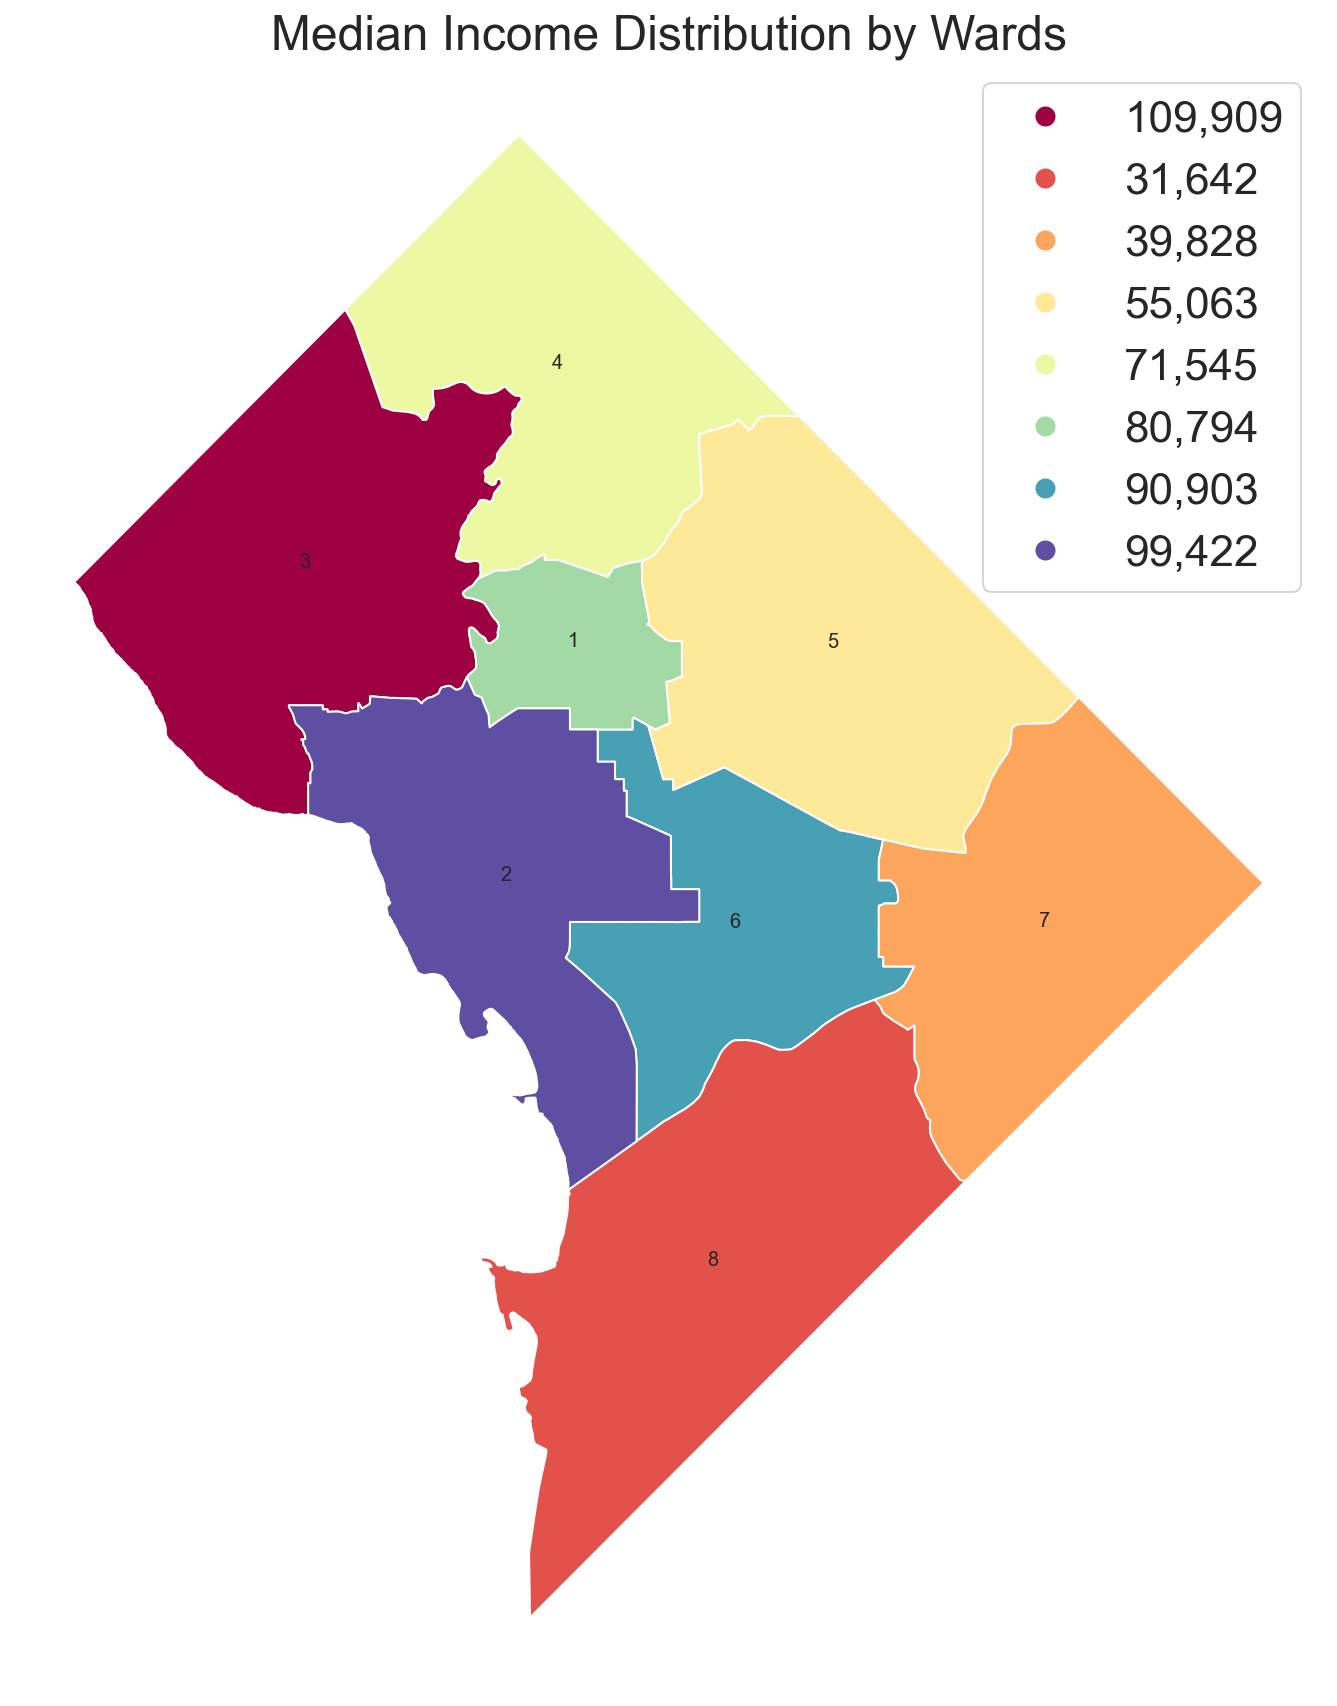

In [22]:
# Plotting Heatmap based on Median Income
print("Heatmap #1: Median Income Distribution by Wards")
print()
print("Lowest to Highest Income by Ward: 8,7,5,4,1,6,2,3")
print()
print("Income levels are lowest for wards 8 and 7, highest for wards 2 and 3")
print()
ward_label = data_map_merge.plot(column = 'MEDIAN_INCOME', figsize = (15,15), cmap = 'Spectral', legend = True)
data_map_merge.apply(lambda x: ward_label.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ward_label.set_title('Median Income Distribution by Wards')
ward_label.set_axis_off()

# income_dict = {0:'31,642', 1:'39,828', 2:'55,063', 3:'71,545', 4:'80,794', 5:'90,903', 6:'99,422', 7:'109,909'}
# def replace_legend_items(legend, mapping):
#     for txt in legend.texts:
#         for k,v in mapping.items():
#             if txt.get_text() == str(k):
#                 txt.set_text(v)
# replace_legend_items(ward_label.get_legend(), income_dict)

# legend sort code did not work, moving on for now


Heatmap #2: Median Home Value Distribution by Wards

Lowest to Highest Income by Ward: 8,7,5,4,1,6,2,3

Lowest to Highest Home Value by Ward: 7,8,5,4,1,6,2,3

Home value is the lowest for 7 &8 and highest for 2&3

We can determine that income and home value is correlated. Higher income means residents are better able to afford higher value homes.  



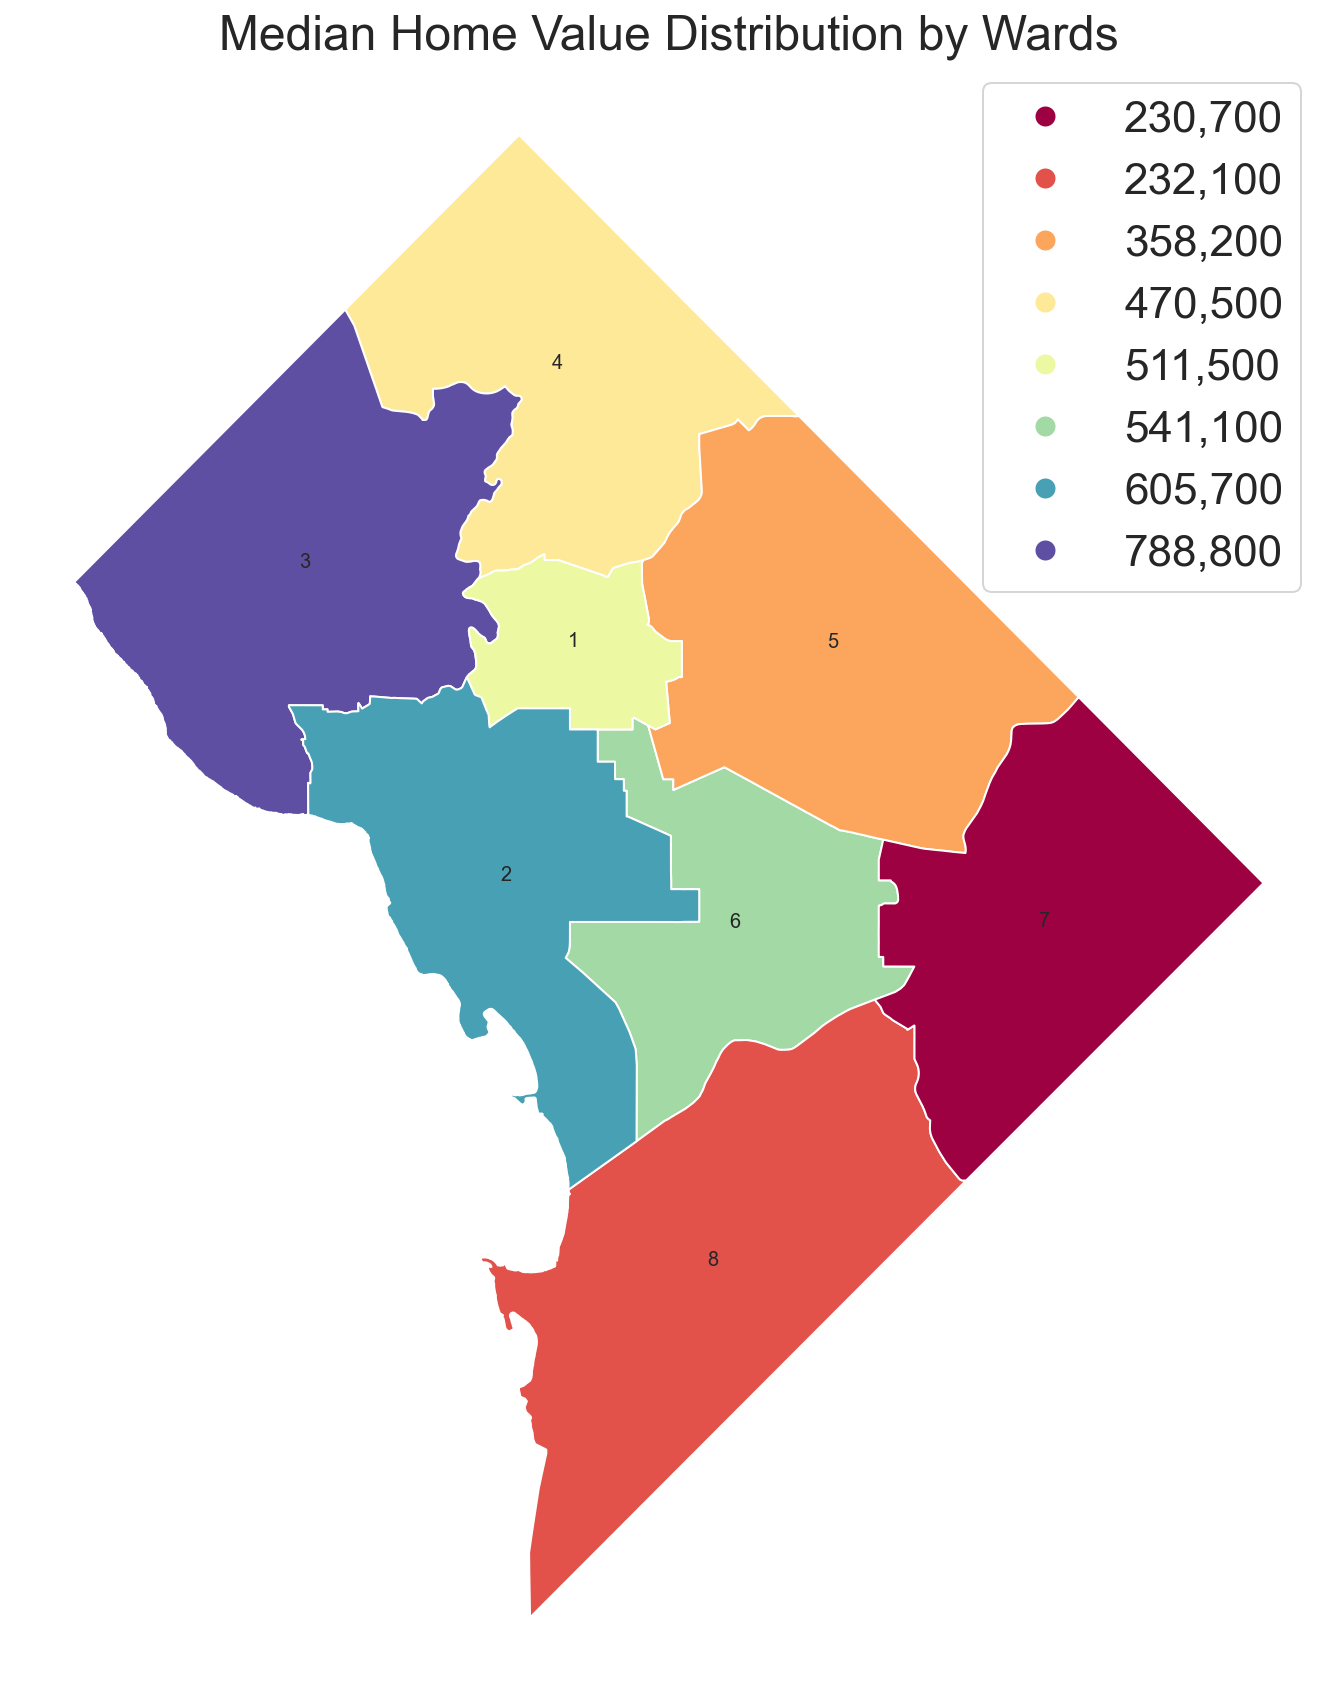

In [23]:
# Plotting Heatmap based on Median Home Value
print("Heatmap #2: Median Home Value Distribution by Wards")
print()
print("Lowest to Highest Income by Ward: 8,7,5,4,1,6,2,3")
print()
print("Lowest to Highest Home Value by Ward: 7,8,5,4,1,6,2,3")
print()
print("Home value is the lowest for 7 &8 and highest for 2&3")
print()
print("We can determine that income and home value is correlated. Higher income means residents are better able to afford higher value homes.  ")
print()
ward_label = data_map_merge.plot(column = 'MEDIAN_HOME_VALUE', figsize = (15,15), cmap = 'Spectral', legend = True)
data_map_merge.apply(lambda x: ward_label.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ward_label.set_title('Median Home Value Distribution by Wards')
ward_label.set_axis_off()

Histogram #1: Crime Distribution by Ward

Crime occurs less in lowest income/homevalue Wards 7 and 8 compared to in higher income/homevalue Ward 2


<AxesSubplot:xlabel='WARD', ylabel='Count'>

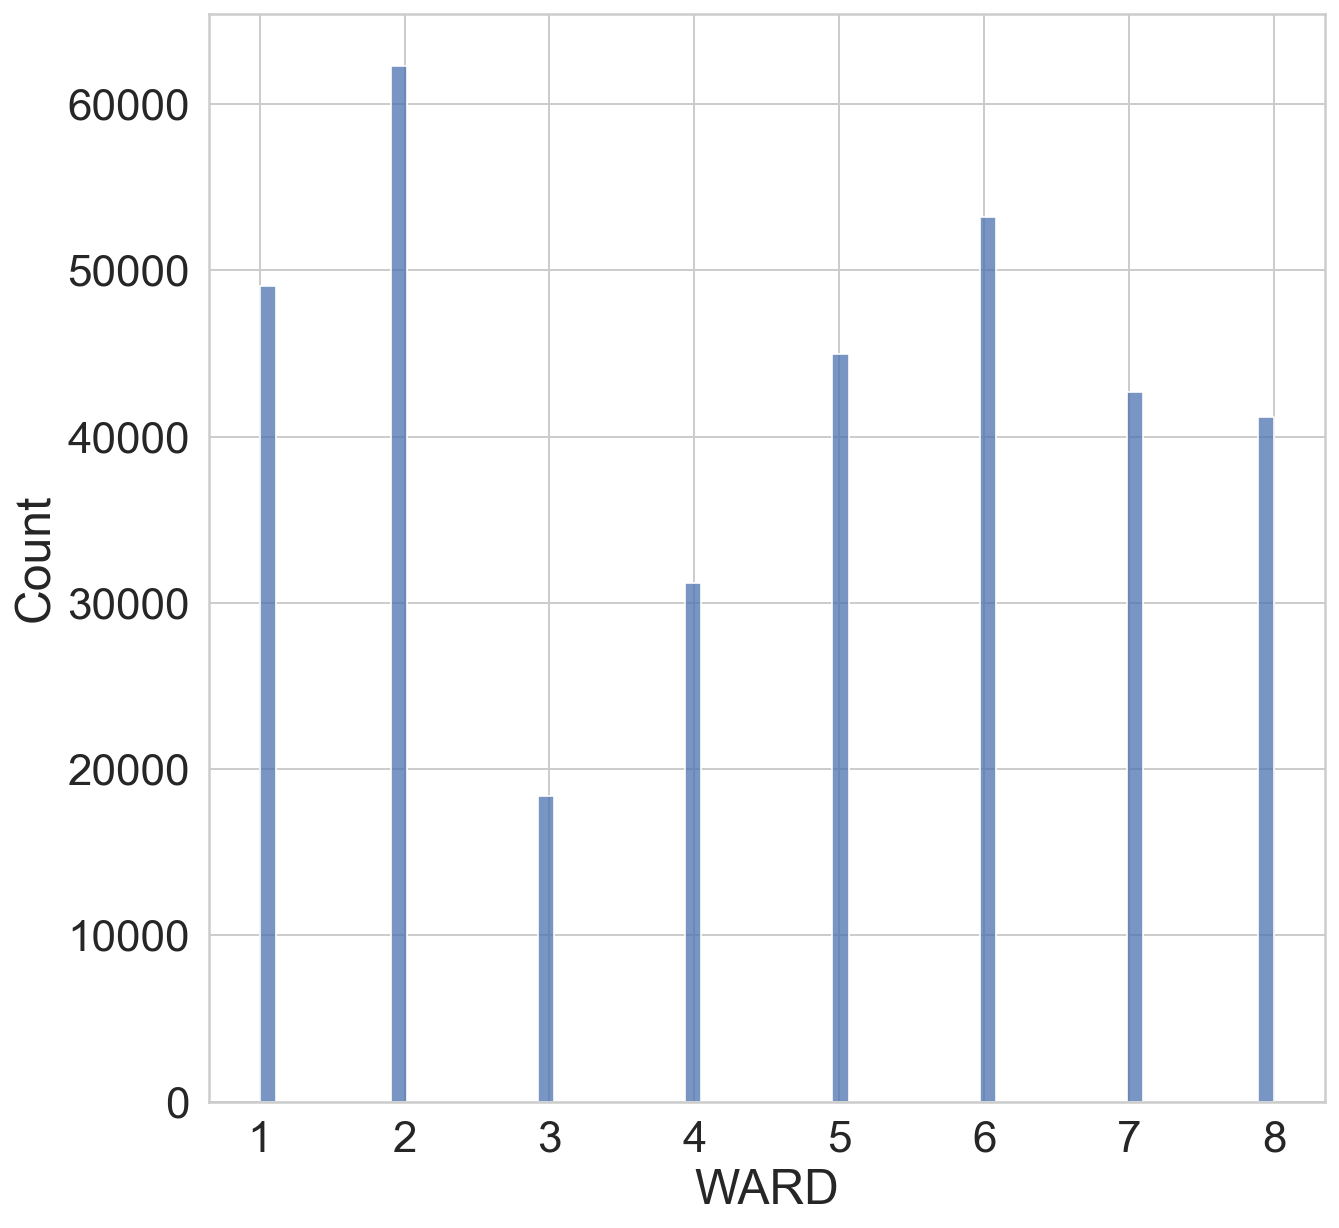

In [28]:
# Analyzing crime distribution by Ward
print("Histogram #1: Crime Distribution by Ward")
print()
print("Crime occurs less in lowest income/homevalue Wards 7 and 8 compared to in higher income/homevalue Ward 2")
plt.figure(figsize = (10,10))
sns.histplot(data = data_merge, x = 'WARD')

However, when diving deeper into the data, violent crime is more prevelant in lower income/homevalue wards (Ward7/8)
Non violent crimes are more prevalent in higher income and homevalue wards (Ward 2).


<AxesSubplot:xlabel='WARD', ylabel='count'>

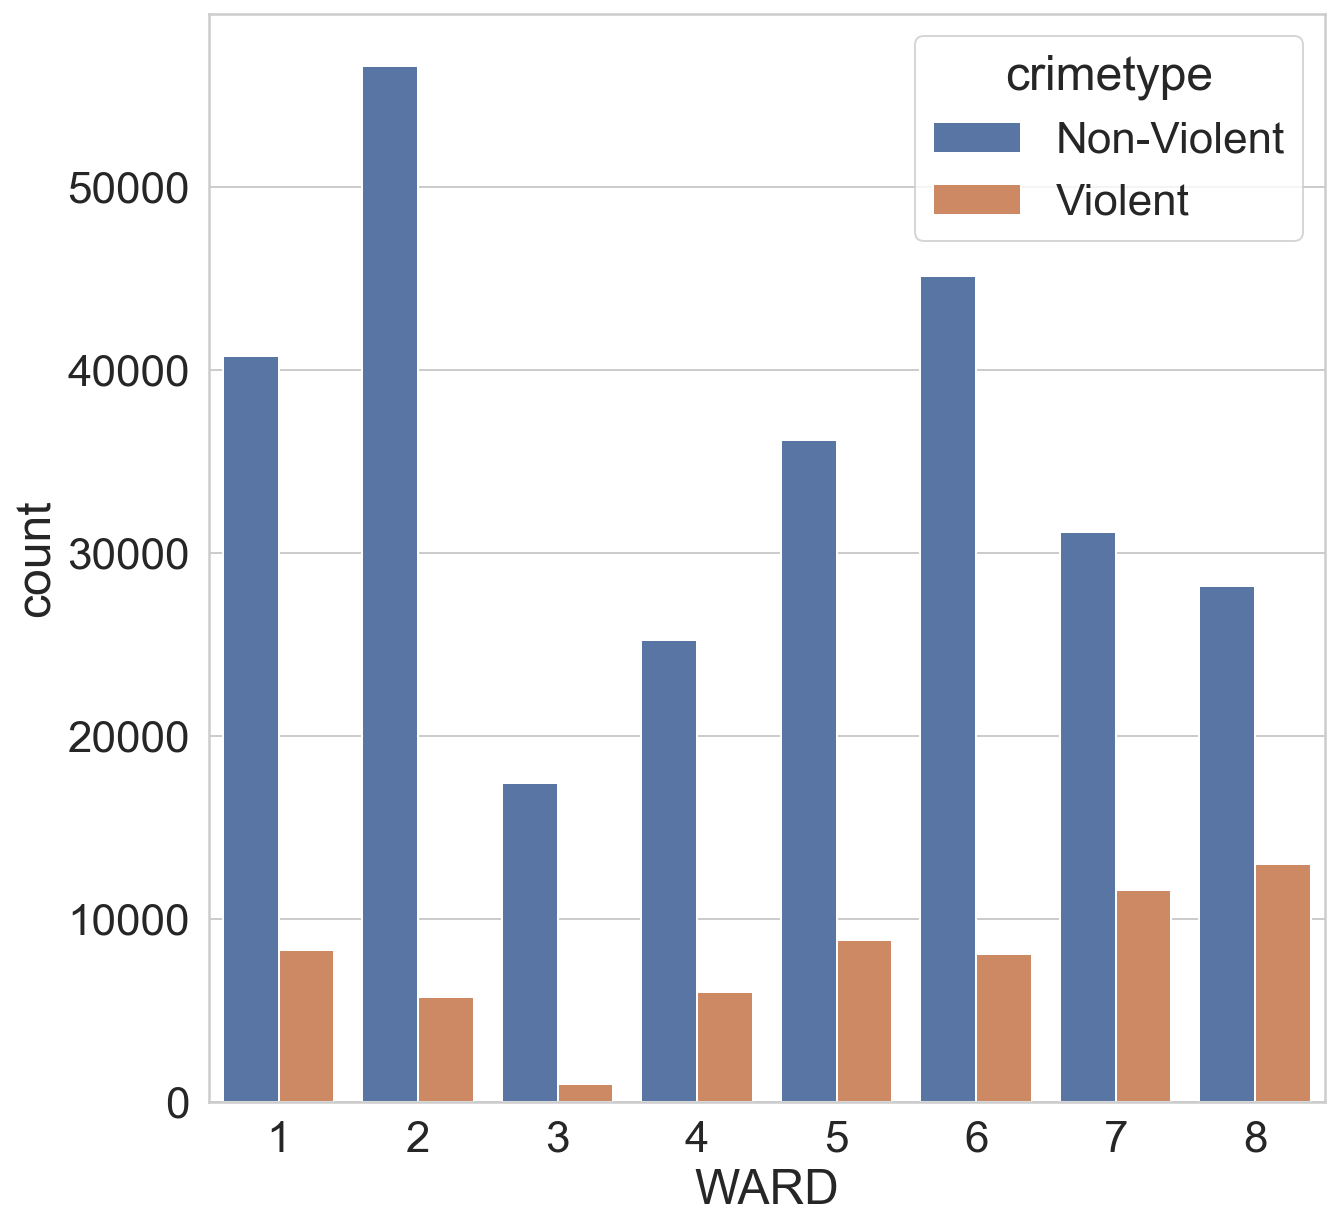

In [26]:
# Analyzing crime distribution by Ward
print('However, when diving deeper into the data, violent crime is more prevelant in lower income/homevalue wards (Ward7/8)')
print()
print("Non violent crimes are more prevalent in higher income and homevalue wards (Ward 2).")
plt.figure(figsize = (10,10))
sns.countplot(data = data_merge, x = 'WARD', hue = 'crimetype')

Theft is highest in Ward 2. We hypothesise that it has higher value stores, locations and items which are more attractive to steal. Also, it is non violent theft as these wards are likely more developed and have higher security. 

Robbery is highest in Ward 7/8. It is theft with force (violent theft). These wards have lower development and security making it more likely for criminals to use force if they are unlikely to be caught. 


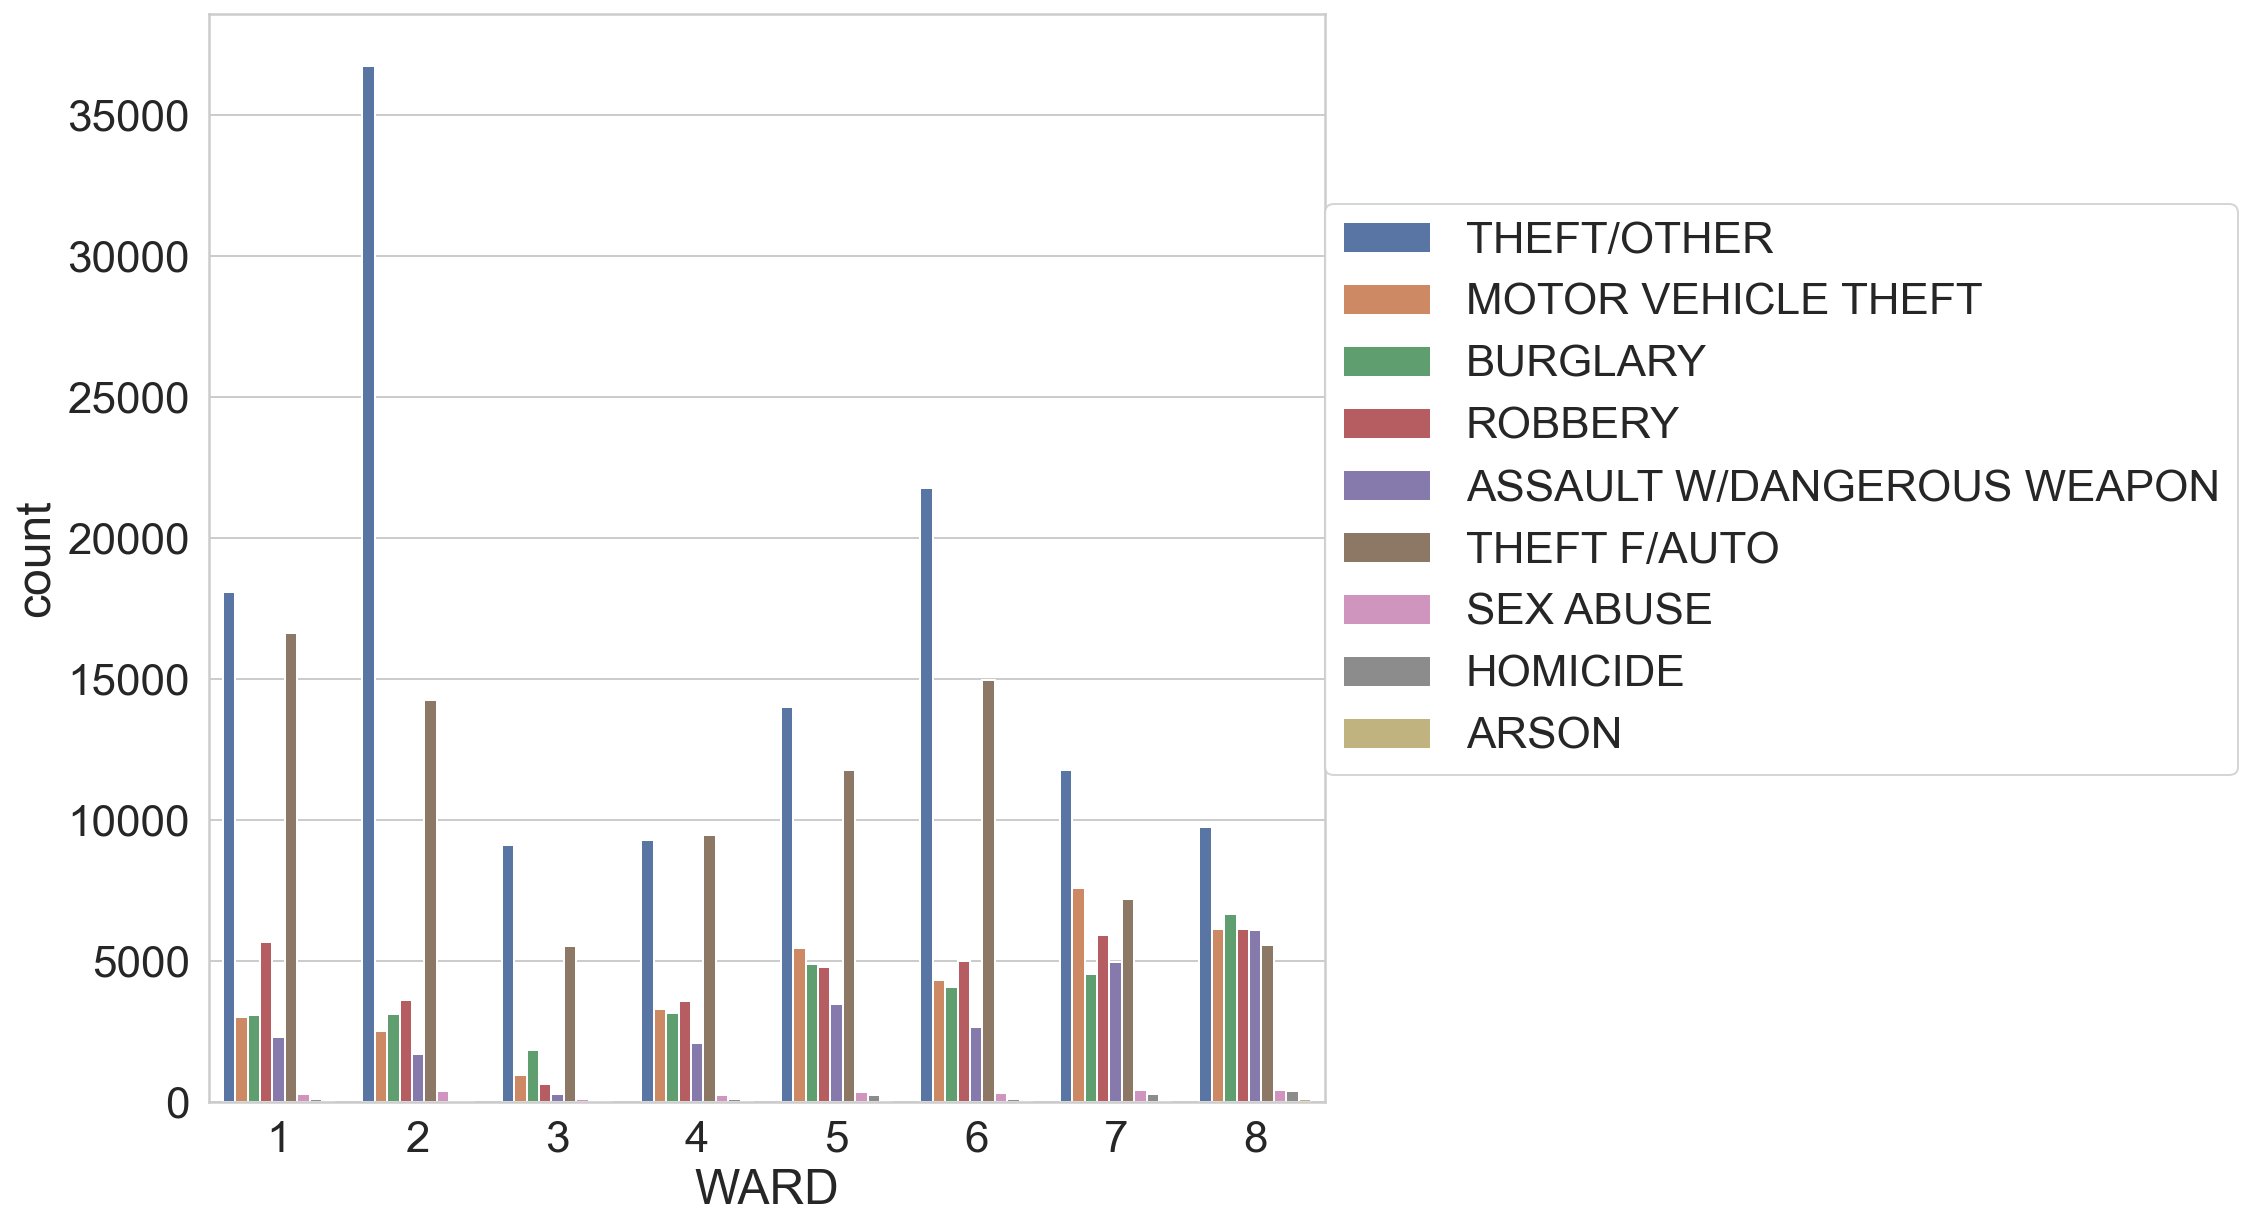

In [33]:
# Analyzing crime distribution by Ward
print("Theft is highest in Ward 2. We hypothesise that it has higher value stores, locations and items which are more attractive to steal. Also, it is non violent theft as these wards are likely more developed and have higher security. ")
print()
print("Robbery is highest in Ward 7/8. It is theft with force (violent theft). These wards have lower development and security making it more likely for criminals to use force if they are unlikely to be caught. ")
plt.figure(figsize = (10,10))
sns.countplot(data = data_merge, x = 'WARD', hue = 'OFFENSE')
plt.legend(loc=(1, 0.3))

**HYPOTHESIS 2: Relationship between SHIFT and CRIMETYPE**

*Most crime occurs around the evening period, making up 42.5% of the total crimes committed*

*The least amount of crime occurs at midnight, making up about 19.1% of the total crimes committed*

*Criminals need to sleep too*

*Violent crime is least likely to happen in the day, due to higher probability of being caught*

*Violent crime is equally prevalent in the evening and midnight, due to lower probability of being caught*

*Also, when analysing the time when crime occurs. We see that crime whether violent or non violent, are mostly likely to occur at the same time of the day. However violent crime occurs at a larger time frame compared to non violent, mostly because non violent is less likely to occur during the day.*

Pie Chart #1: Crimes vs Shifts



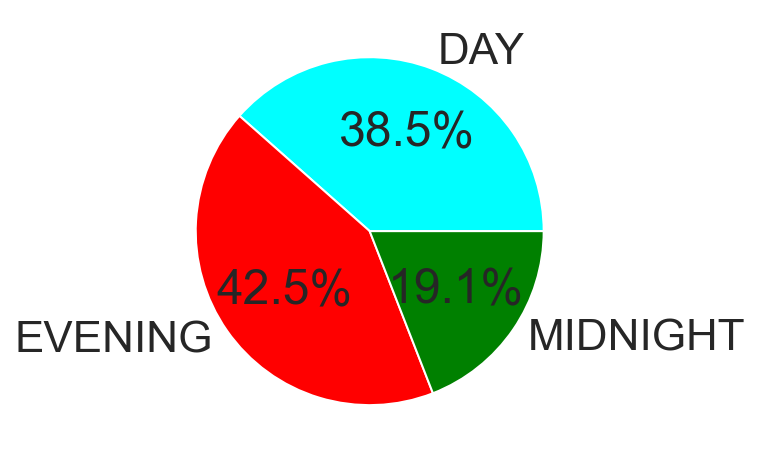

Most crime occurs around the evening period, making up 42.5% of the total crimes committed.



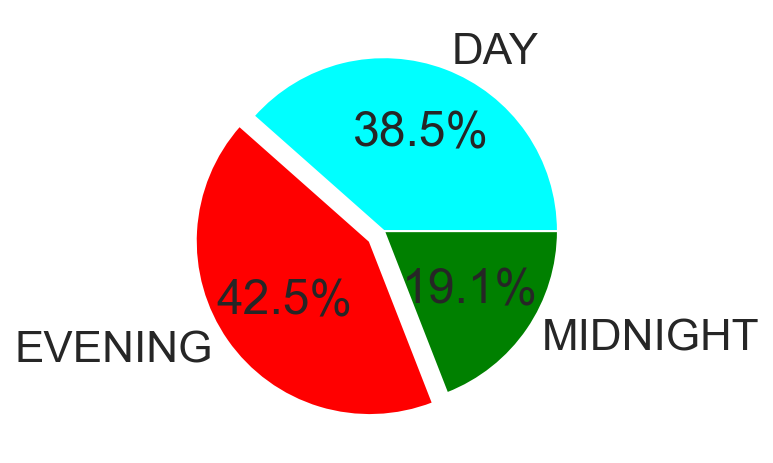

The least amount of crime occurs at midnight, making up about 19.1% of the total crimes committed.



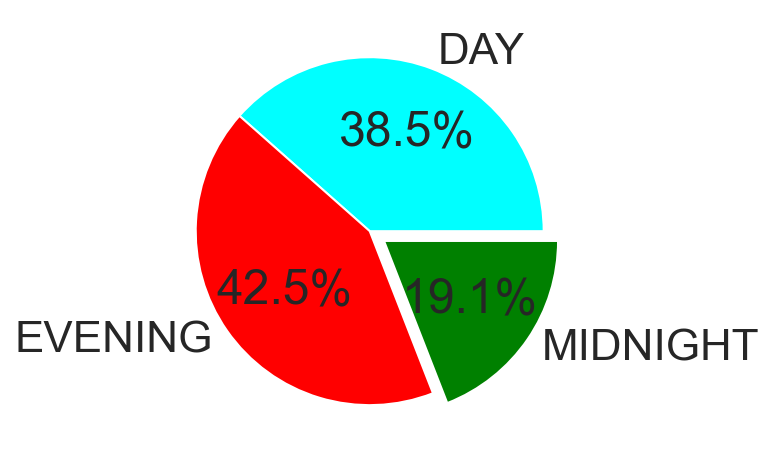

Bar Chart: Types of Crime vs Shifts
Violent crime is least likely to happen in the day. Perhaps due to higher probability of being caught.
Violent crime is equally prevalent in the evening and midnight.Perhaps due to lower probability of being caught



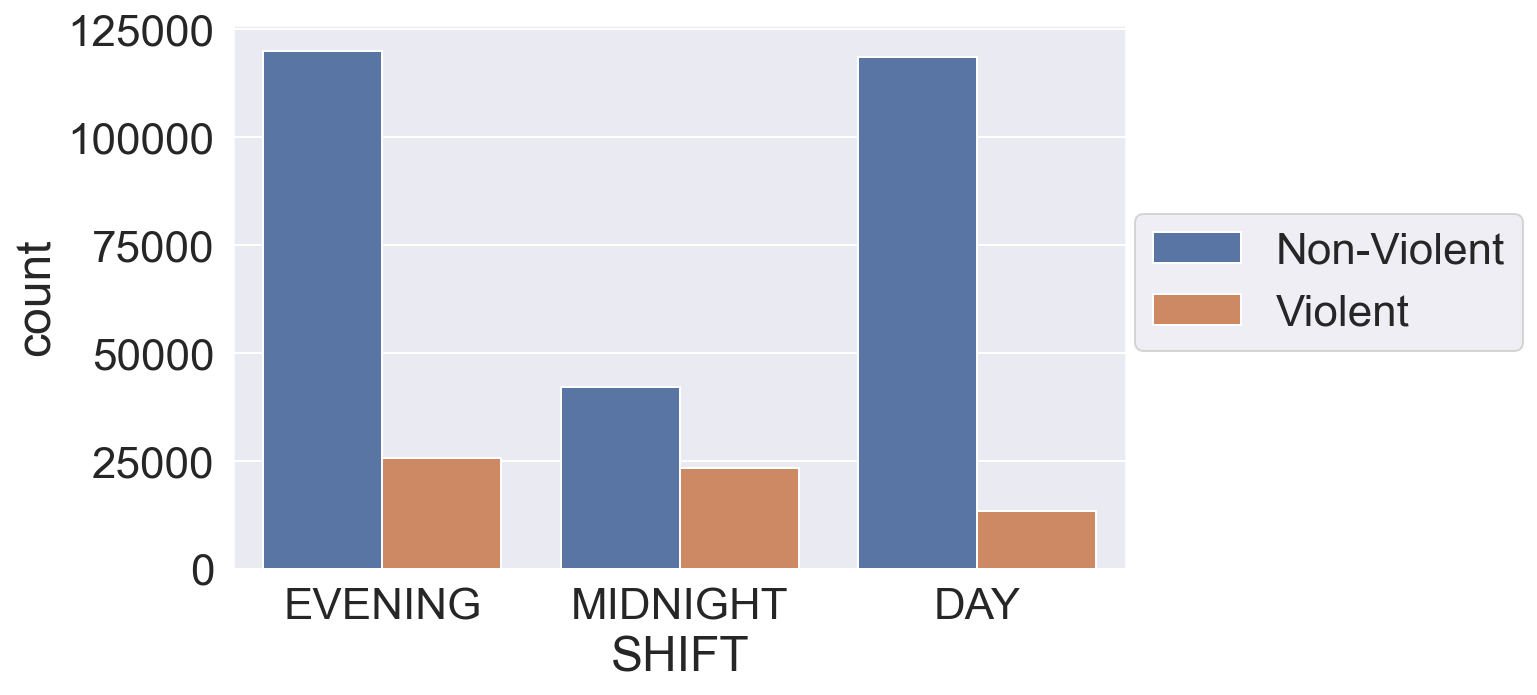

In [53]:
print('Pie Chart #1: Crimes vs Shifts')
print('')

data_merge['COUNT']=1
crime_shift=data_merge.groupby('SHIFT')[['COUNT']].sum()
colors_list=['cyan','red','green']
plt.pie(crime_shift['COUNT'],labels= crime_shift.index,autopct='%1.1f%%',colors=colors_list)
plt.show()

print('Most crime occurs around the evening period, making up 42.5% of the total crimes committed.')
print('')
explode_val=(0,0.1,0) #each element represents a shift 
plt.pie(crime_shift['COUNT'],labels= crime_shift.index,
        autopct='%1.1f%%', explode=explode_val,
        colors=colors_list)
plt.show()

print('The least amount of crime occurs at midnight, making up about 19.1% of the total crimes committed.')
print('')
explode_val=(0,0,0.1) #each element represents a shift 
plt.pie(crime_shift['COUNT'],labels= crime_shift.index,
        autopct='%1.1f%%', explode=explode_val,
        colors=colors_list)
plt.show()

print('Bar Chart: Types of Crime vs Shifts')
print('Violent crime is least likely to happen in the day. Perhaps due to higher probability of being caught.')
print('Violent crime is equally prevalent in the evening and midnight.Perhaps due to lower probability of being caught')
print('')
crime_shift_bar=data_merge[['SHIFT','crimetype']]
plt.figure(figsize=(8,5))
sns.countplot(x='SHIFT',hue='crimetype',data=crime_shift_bar)
plt.legend(loc=(1.01, 0.4))

***HYPOTHESIS 3:Time of year vs Crime  ***

*feb is coldest, less crime // feb has fewest days, less crime overall*

In [ ]:
time_crime = data_merge[['month', 'crimetype']]
plt.figure(figsize=(50, 45))
sns.countplot(x= 'month', hue='crimetype', data=time_crime)


***HYPOTHESIS 3: Relationship between Crime and Race***

*Non violent crime tend to occur more in predominantly white wards.*

*Violent crime tend to occur more in predominantly black wards.*

*Why does violent crime tend to occur in predominantly black wards?*

*From hypothesis 1 we hypothesize that, Wards 7 and 8 represents the lower income black communities.*

*The lower median home value could be inferred as a proxy for infrastructure/ward developement, which tells us that there is a possibility that wards 7 and 8 are less developed areas of Washington DC.*

*Therefore, crime is more likely to happen in areas where infrastructure and security is low.*



Bar Graph: Ward vs Crimetype 

Based on the bar graph below, we can infer that violent crime are more prevalent in wards 7 and 8


<AxesSubplot:xlabel='WARD', ylabel='count'>

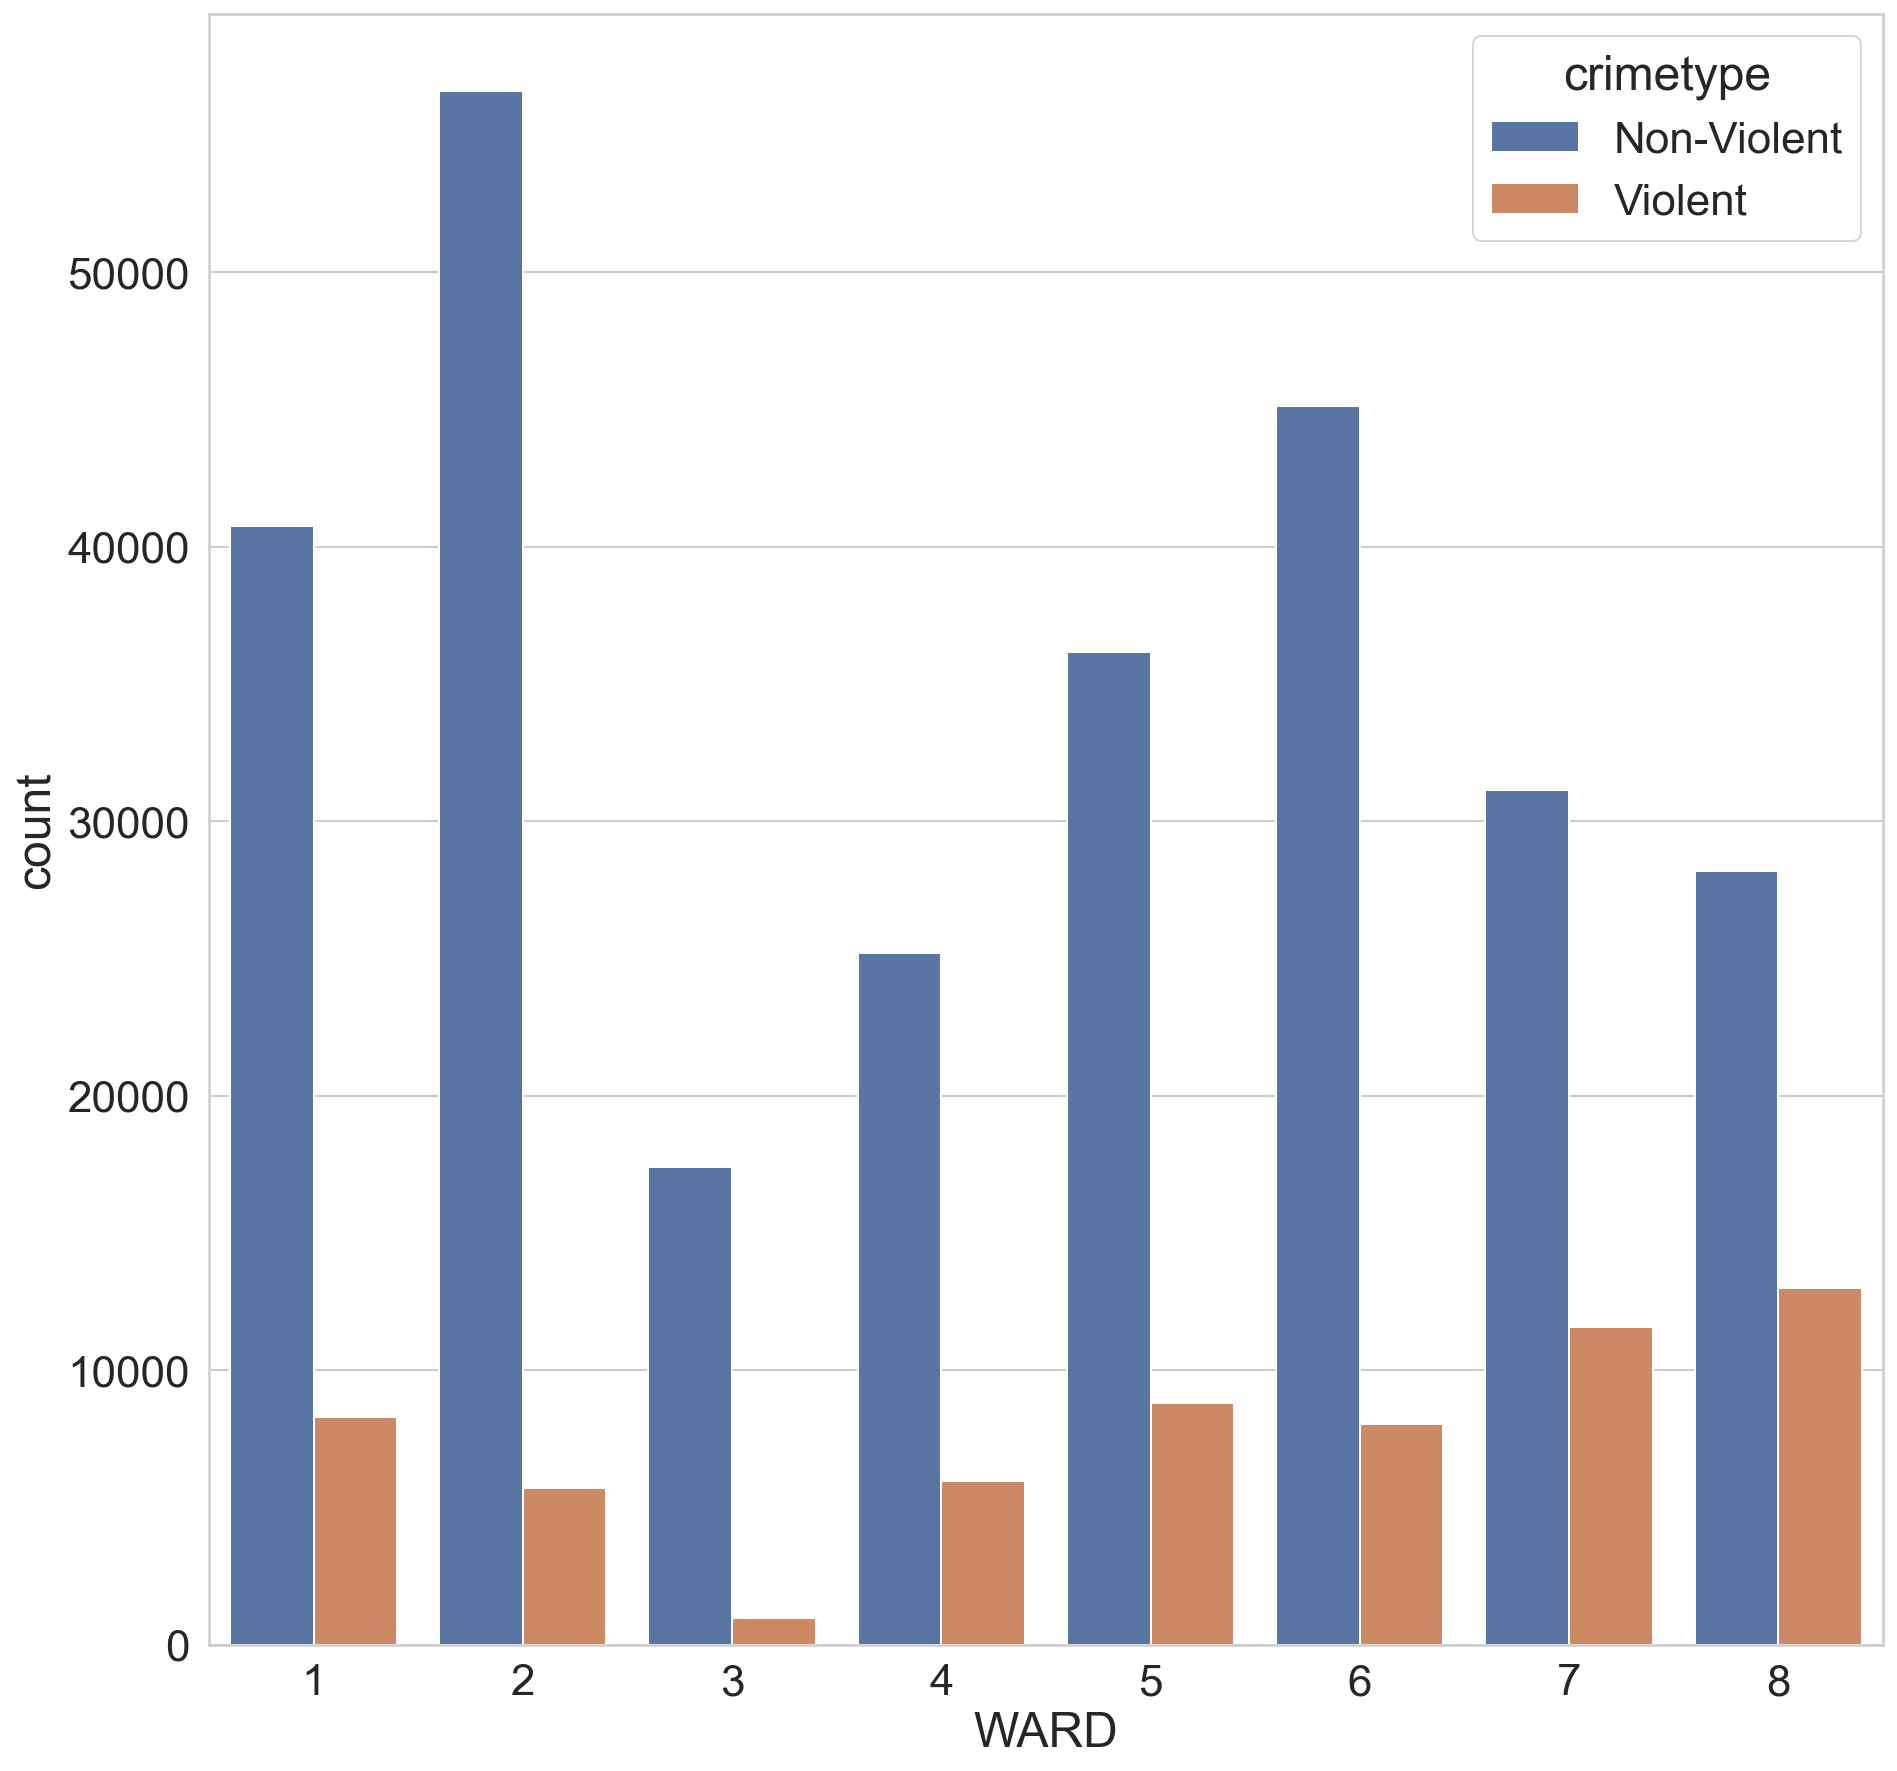

In [43]:
print("Bar Graph: Ward vs Crimetype ")
print()
print("Based on the bar graph below, we can infer that violent crime are more prevalent in wards 7 and 8")
time_crime = data_merge[['WARD', 'crimetype']]
plt.figure(figsize=(15, 15))
sns.countplot(x= 'WARD', hue='crimetype', data=time_crime)

Bar Graph: Ward vs MAJOR_RACE

The second barchart shows that, in wards 7 and 8 where violent crimes are more prevalent, are inhabited by the Black community.

Therefore, we hypothesize that the black community is more subceptible to violent crimes.


<AxesSubplot:xlabel='WARD', ylabel='count'>

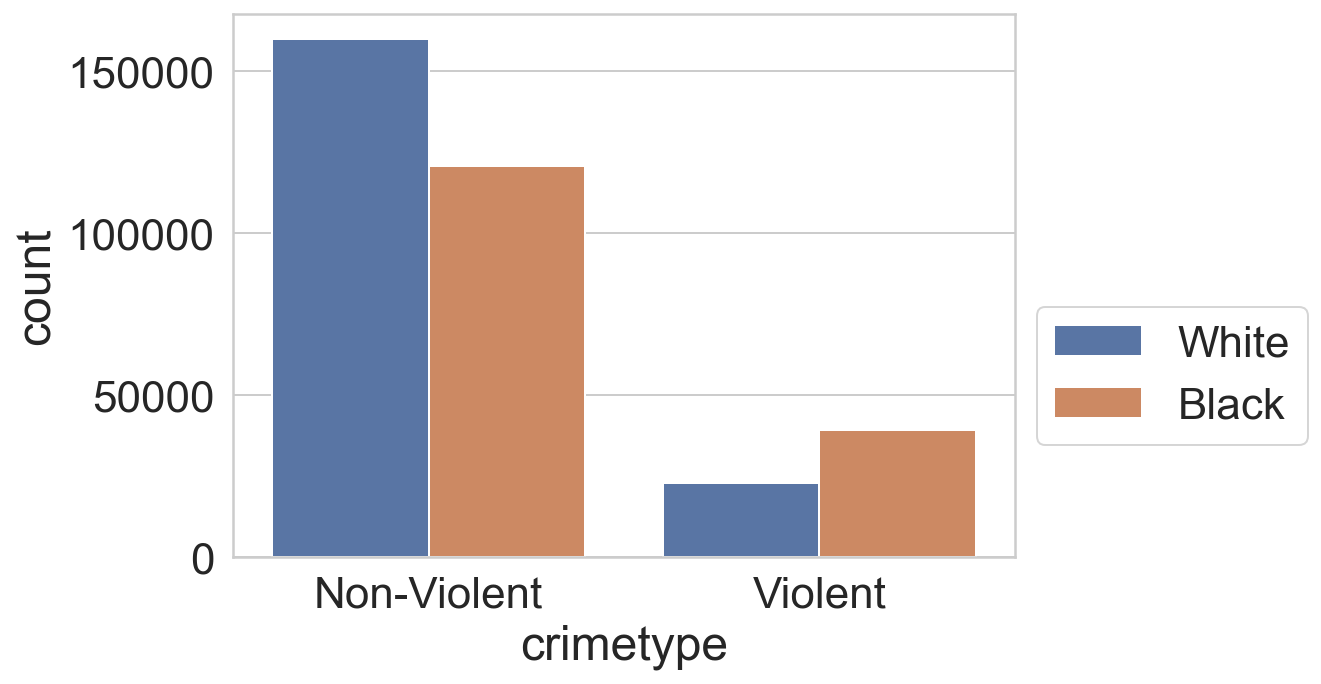

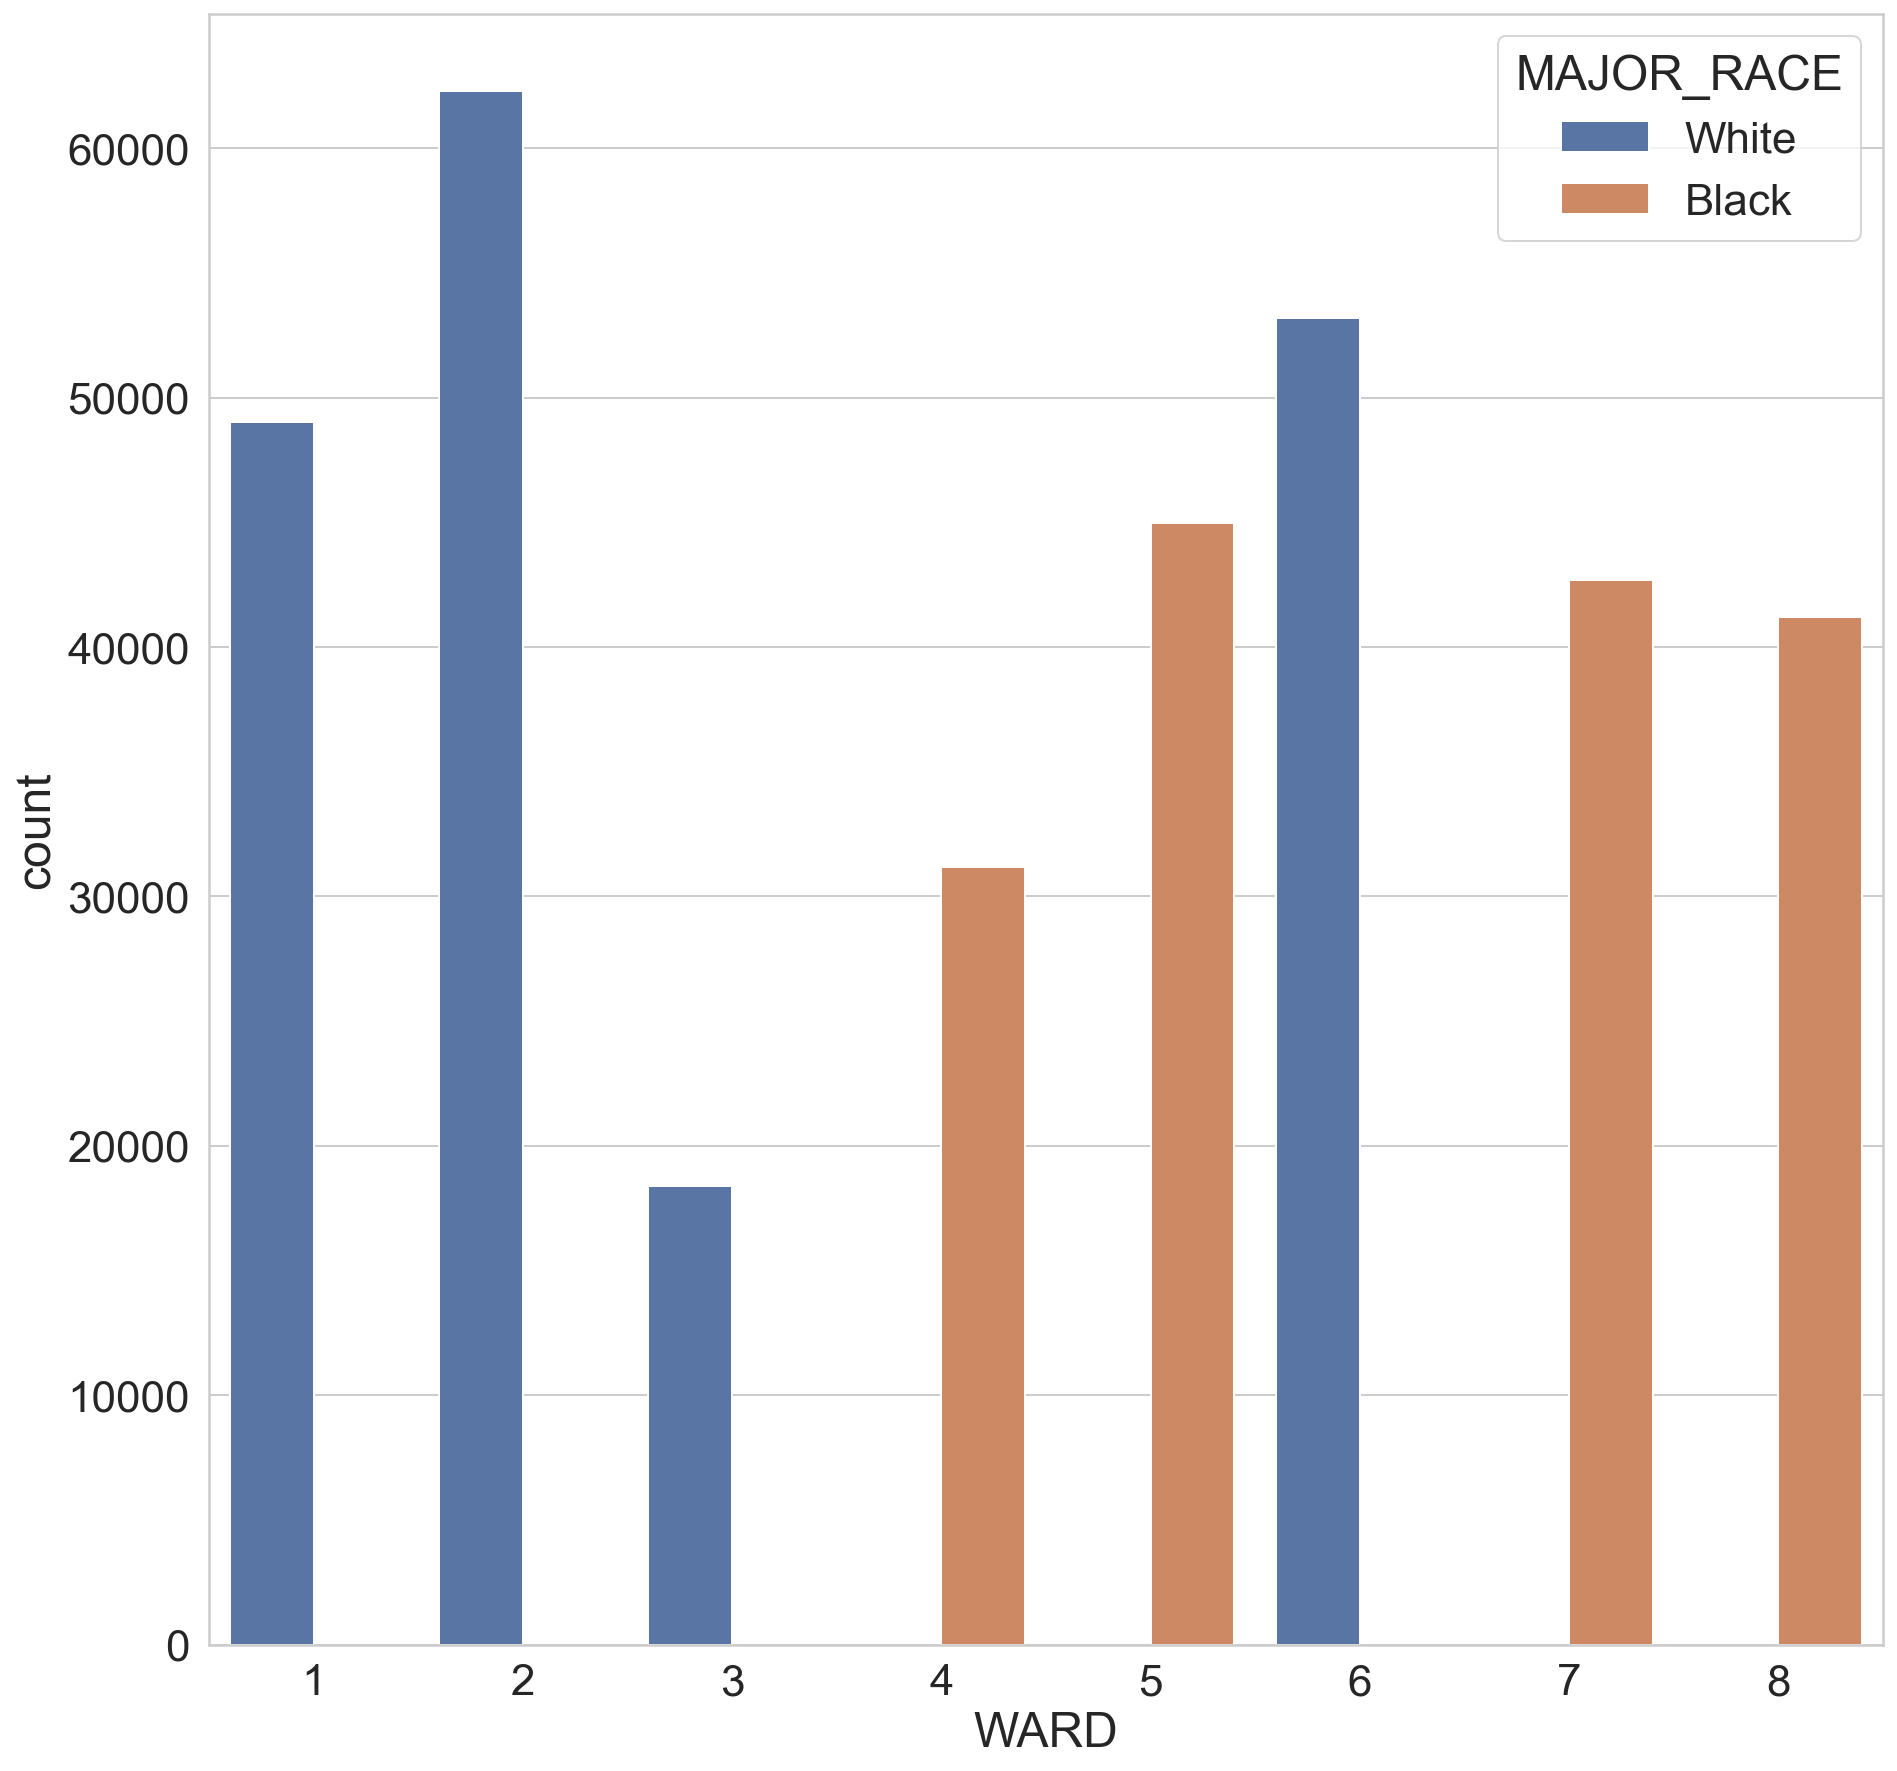

In [45]:
print("Bar Graph: Ward vs MAJOR_RACE")
print()
print("The second barchart shows that, in wards 7 and 8 where violent crimes are more prevalent, are inhabited by the Black community.")
print()
print("Therefore, we hypothesize that the black community is more subceptible to violent crimes.")

race_crime=data_merge[['crimetype','MAJOR_RACE']]
plt.figure(figsize=(7,5))
sns.countplot(x='crimetype',hue='MAJOR_RACE',data=race_crime,)
plt.legend(bbox_to_anchor=(1,0.5))

race_crime2 = data_merge[['WARD', 'MAJOR_RACE']]
plt.figure(figsize=(15, 15))
sns.countplot(x= 'WARD', hue='MAJOR_RACE', data=time_crime)

To better understand why violent crimes are more prevalent in predominantly Black Communities, we look back at Hypothesis 1 with regards to median income and median home value.

We hypothesize that, Wards 7 and 8 represents the lower income black communities, which may be the reason for higher violent crimes.

The lower median home value could be inferred as a proxy for infrastructure/ward developement, which tells us that there is a possibility that wards 7 and 8 are less developed areas of Washington DC.

Therefore, crime is more likely to happen in areas where infrastructure and security is low


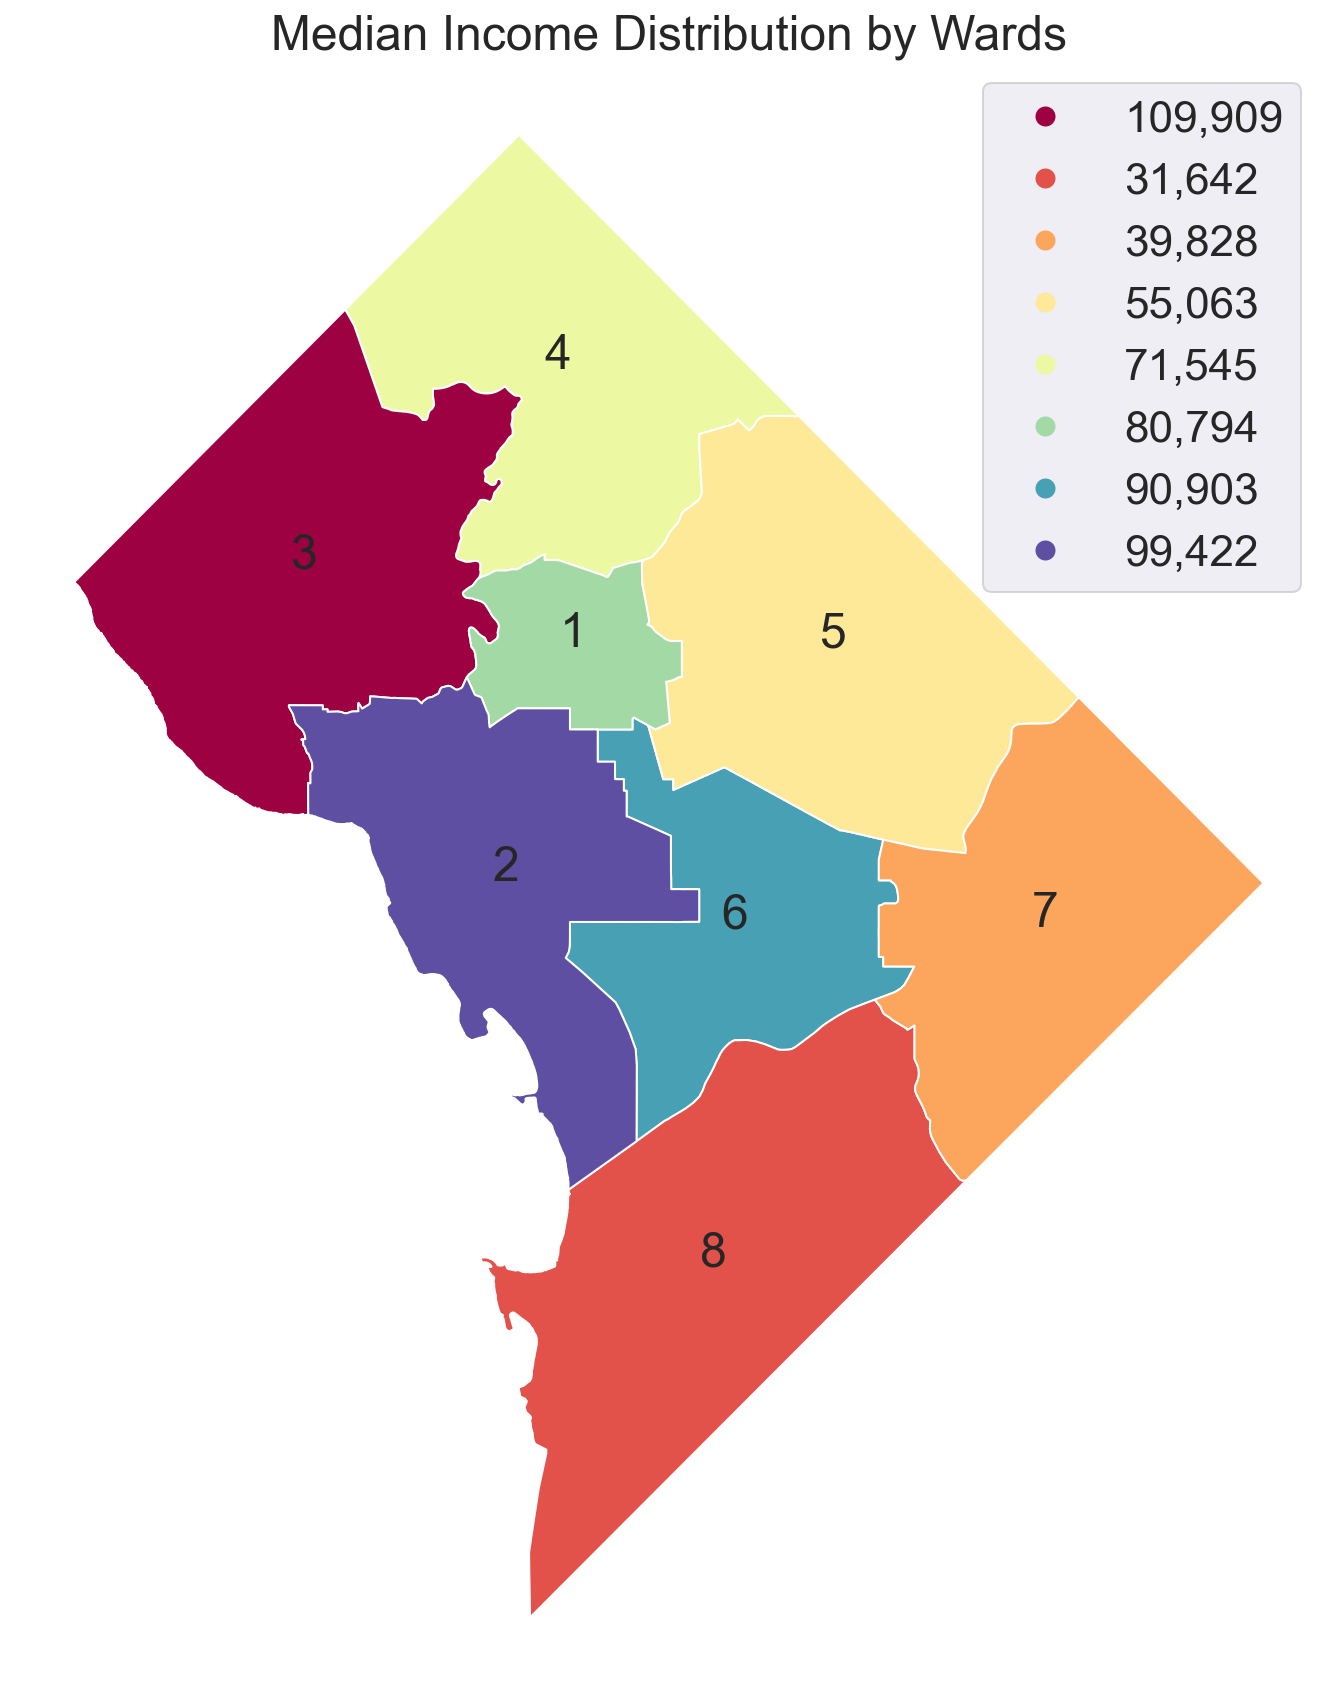

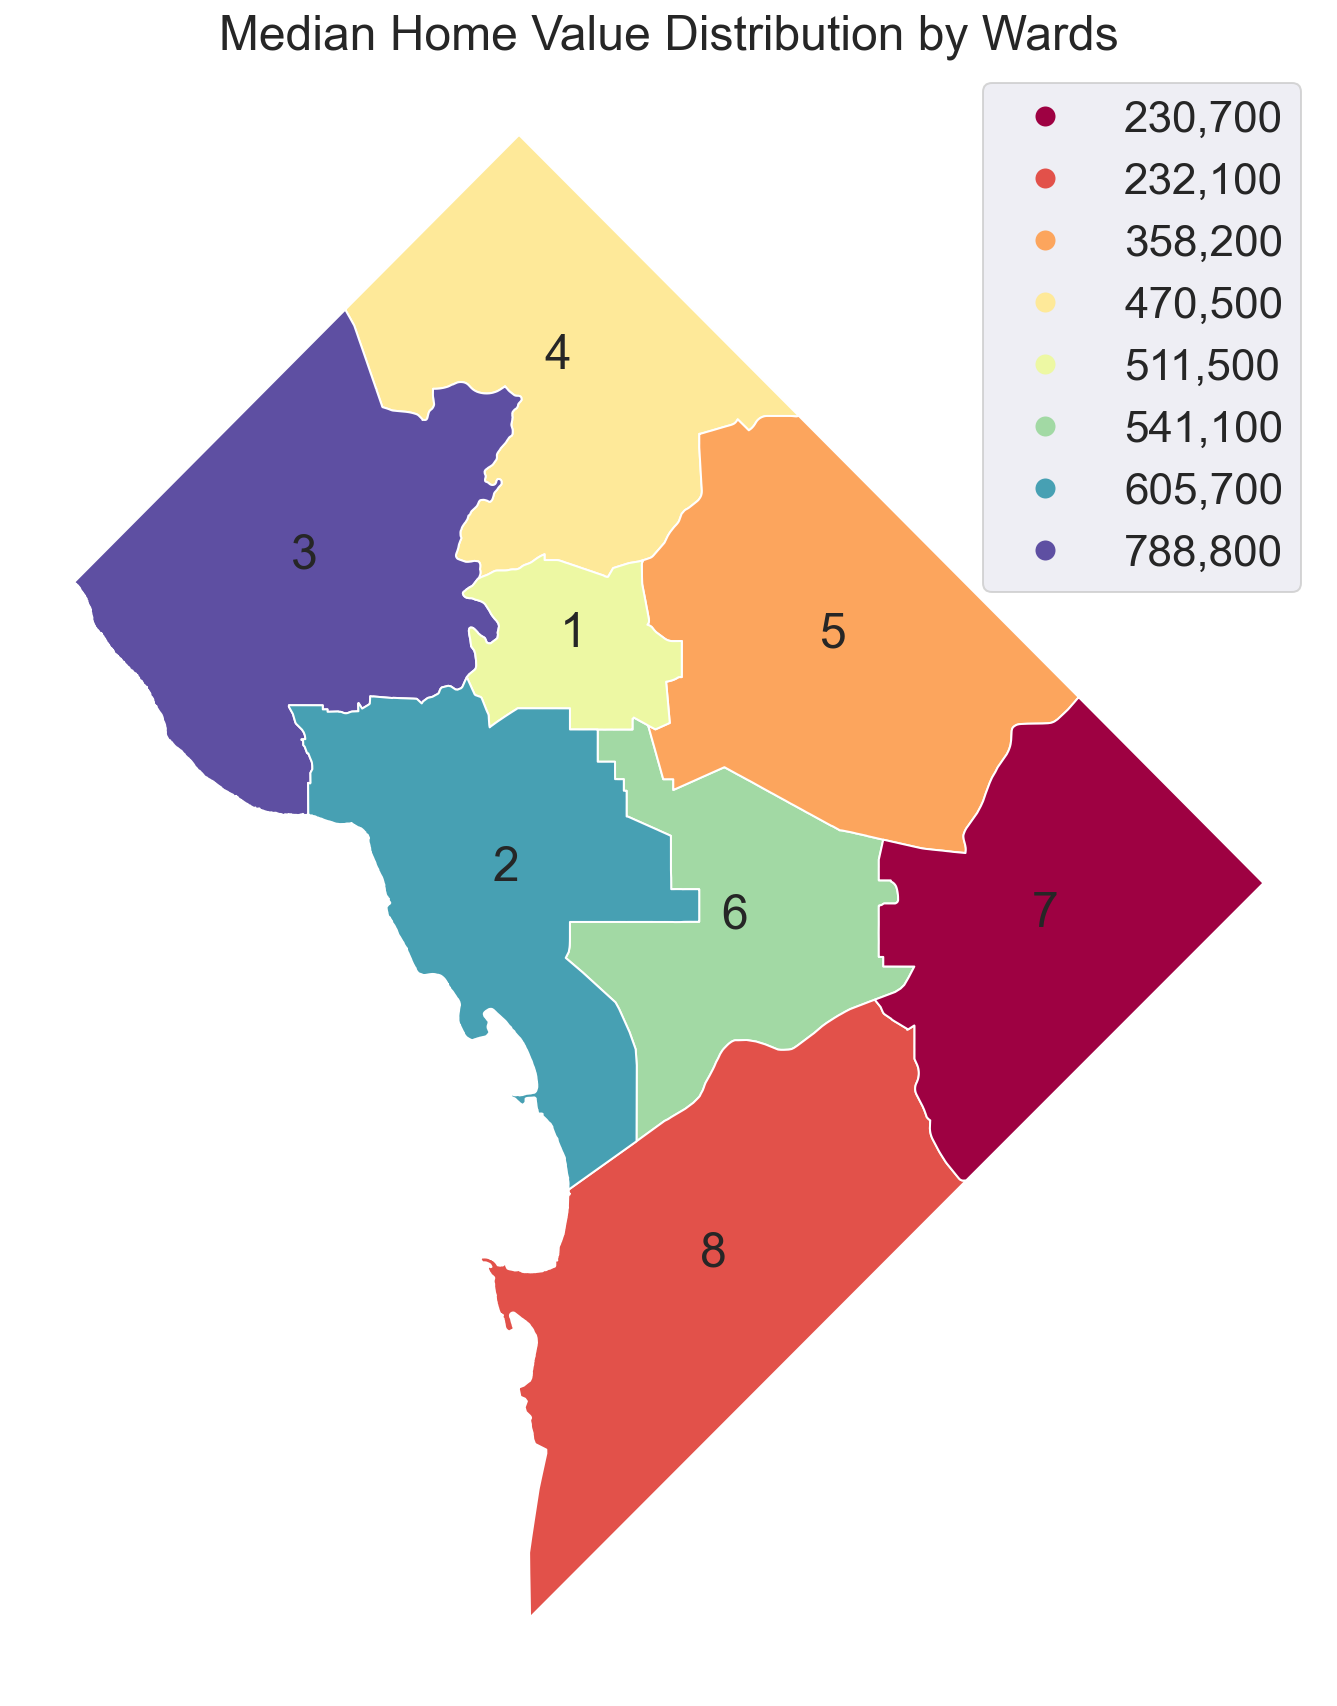

In [54]:
print("To better understand why violent crimes are more prevalent in predominantly Black Communities, we look back at Hypothesis 1 with regards to median income and median home value.")
print()
print("We hypothesize that, Wards 7 and 8 represents the lower income black communities, which may be the reason for higher violent crimes.")
print()
print("The lower median home value could be inferred as a proxy for infrastructure/ward developement, which tells us that there is a possibility that wards 7 and 8 are less developed areas of Washington DC.")
print()
print("Therefore, crime is more likely to happen in areas where infrastructure and security is low")

ward_label = data_map_merge.plot(column = 'MEDIAN_INCOME', figsize = (15,15), cmap = 'Spectral', legend = True)
data_map_merge.apply(lambda x: ward_label.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ward_label.set_title('Median Income Distribution by Wards')
ward_label.set_axis_off()

ward_label = data_map_merge.plot(column = 'MEDIAN_HOME_VALUE', figsize = (15,15), cmap = 'Spectral', legend = True)
data_map_merge.apply(lambda x: ward_label.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ward_label.set_title('Median Home Value Distribution by Wards')
ward_label.set_axis_off()

***HYPOTHESIS 4***

*Violent crimes tend to occur away from high secruity areas such as the White House and US Capitol.*

*This links to our previous hypotheses as such areas are higher income wards and distinct due to their high levels of development and security. Hence, we see that violent crime tends to avoid such areas.*

*To test this hypothesis further, we wanted to see how non violent crimes would be distributed around these areas as well. And found that they too avoided the areas of the Whitehouse and the Capitol.*

Where do violent crimes occur?

Violent crimes tend to occur away from high secruity areas such as the White House and US Capitol. 



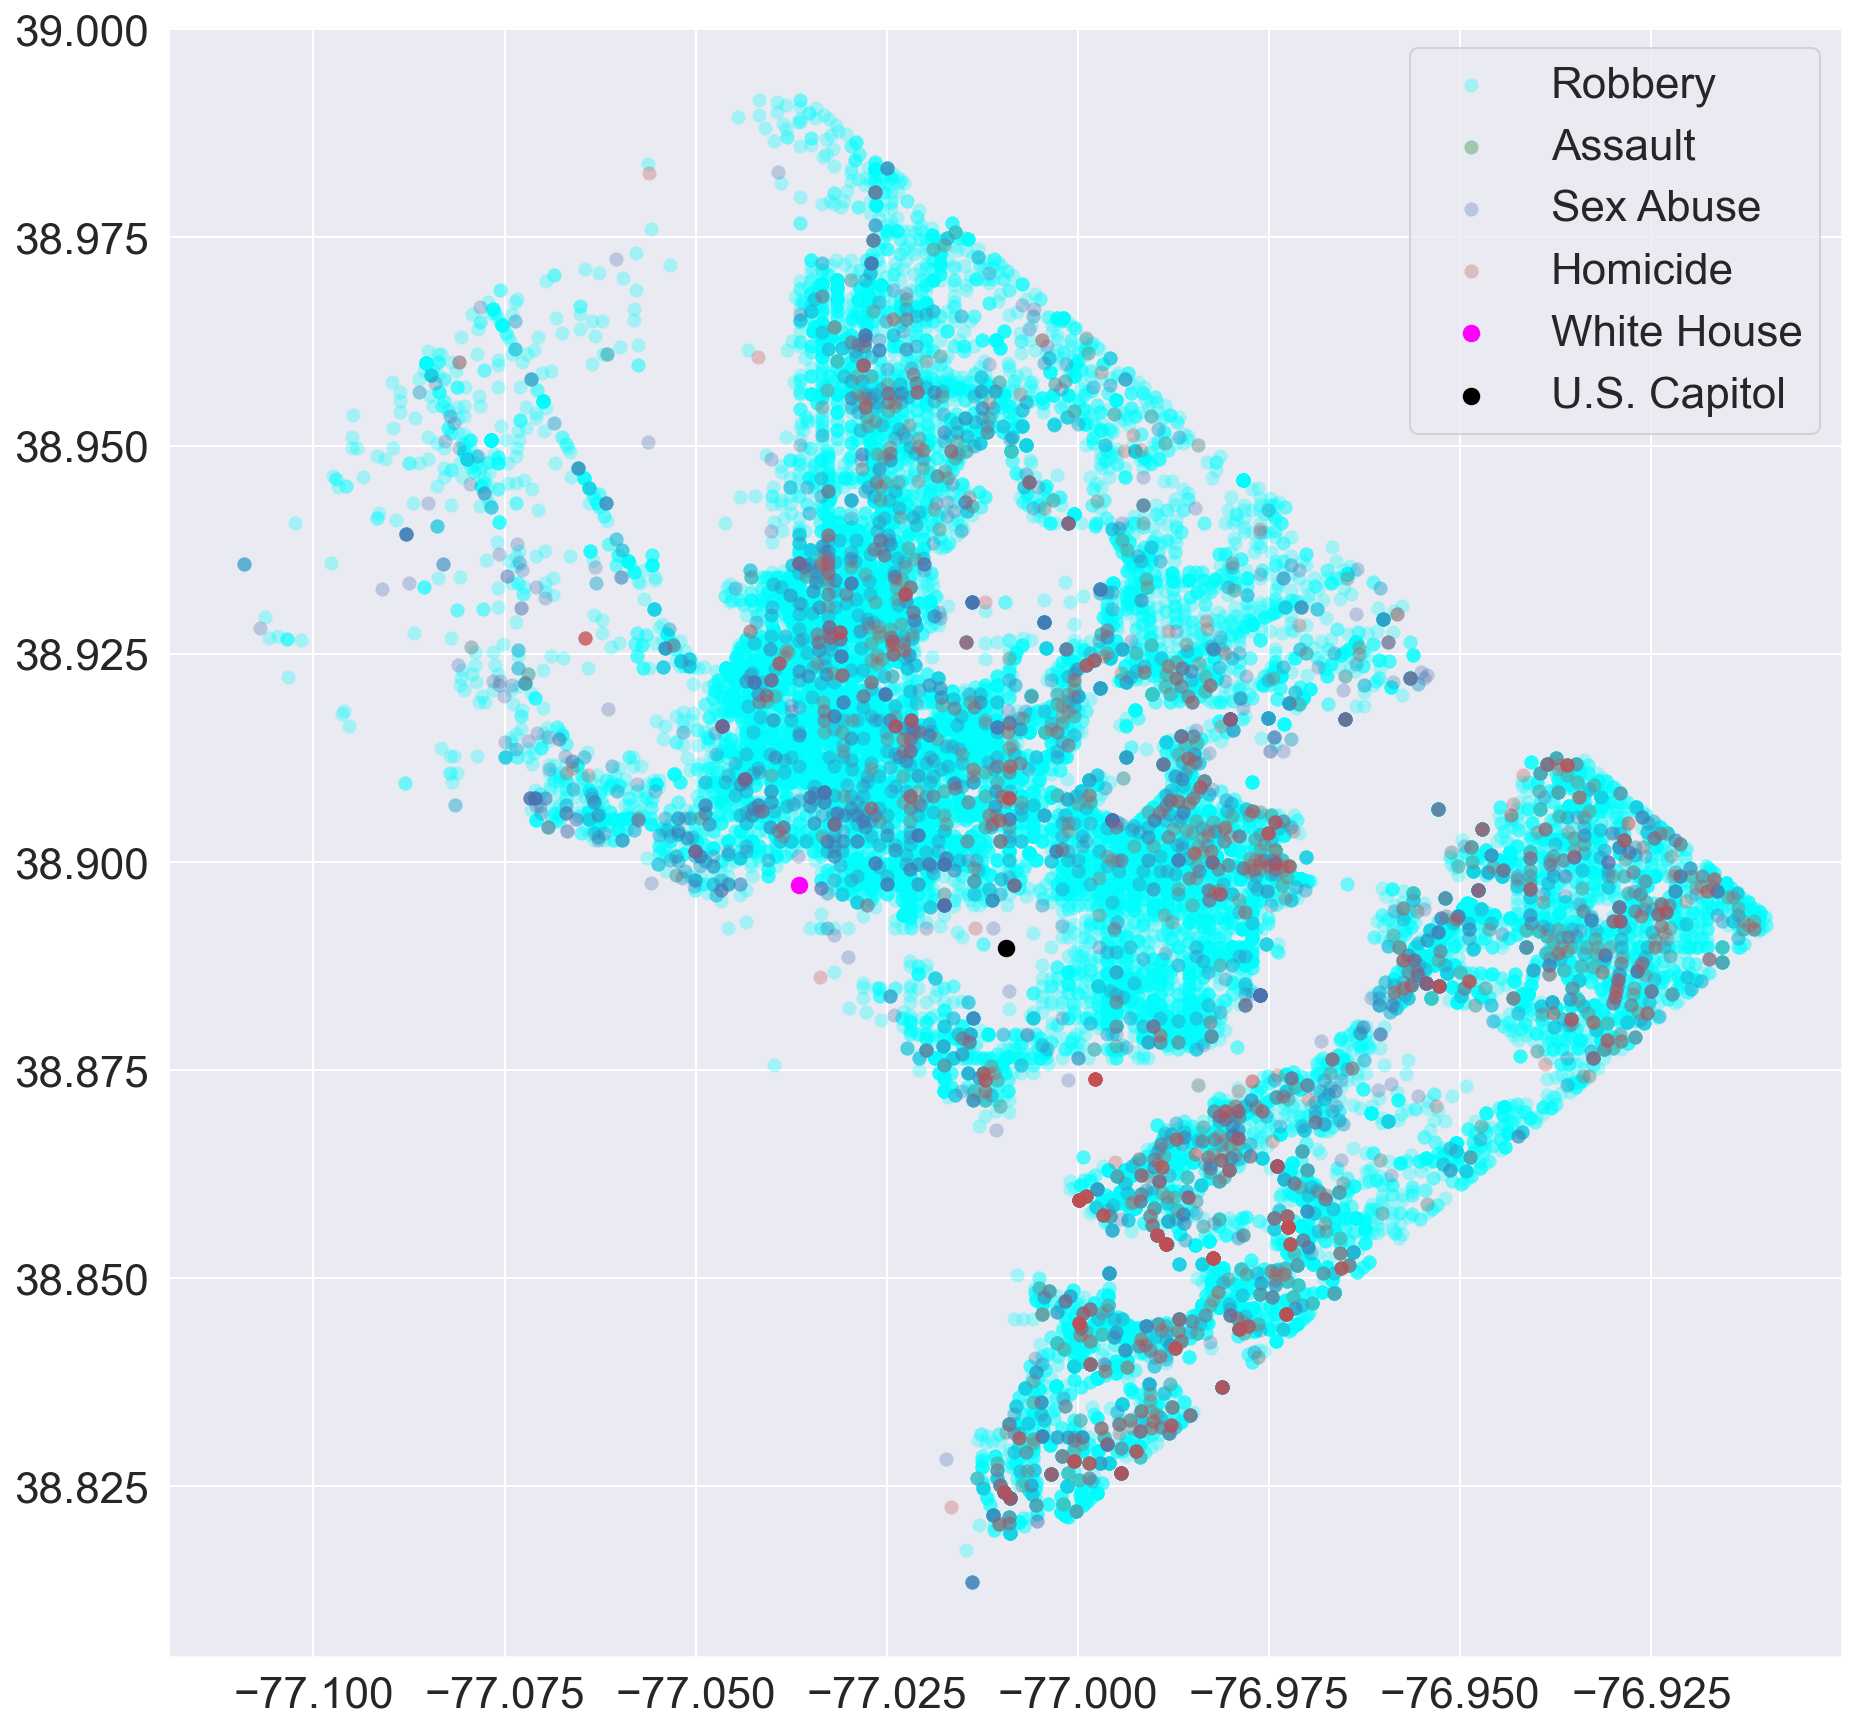

In [57]:
print("Where do violent crimes occur?")
print()
print("Violent crimes tend to occur away from high secruity areas such as the White House and US Capitol. ")
print("")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(data_merge['XBLOCK'][data_merge['OFFENSE']=='ROBBERY'], data_merge['YBLOCK'][data_merge['OFFENSE']=='ROBBERY'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='Robbery')
plt.scatter(data_merge['XBLOCK'][data_merge['OFFENSE']=='ASSAULT W/DW'], data_merge['YBLOCK'][data_merge['OFFENSE']=='ASSAULT W/DW'], s=50, alpha=0.5, color='g', lw=0, label='Assault')
plt.scatter(data_merge['XBLOCK'][data_merge['OFFENSE']=='SEX ABUSE'], data_merge['YBLOCK'][data_merge['OFFENSE']=='SEX ABUSE'], s=50, alpha=0.3, color='b', lw=0, label='Sex Abuse')
plt.scatter(data_merge['XBLOCK'][data_merge['OFFENSE']=='HOMICIDE'], data_merge['YBLOCK'][data_merge['OFFENSE']=='HOMICIDE'], s=50, alpha=0.3, color='r', lw=0, label='Homicide')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
# plt.scatter(-60,60,s=30, color=[0,1,0], lw=1, label='WARD 8') 
plt.legend(loc='upper right')
plt.show()

Where do non violent crimes occur?
Non Violent crimes ALSO tend to occur away from high secruity areas such as the White House and US Capitol. 



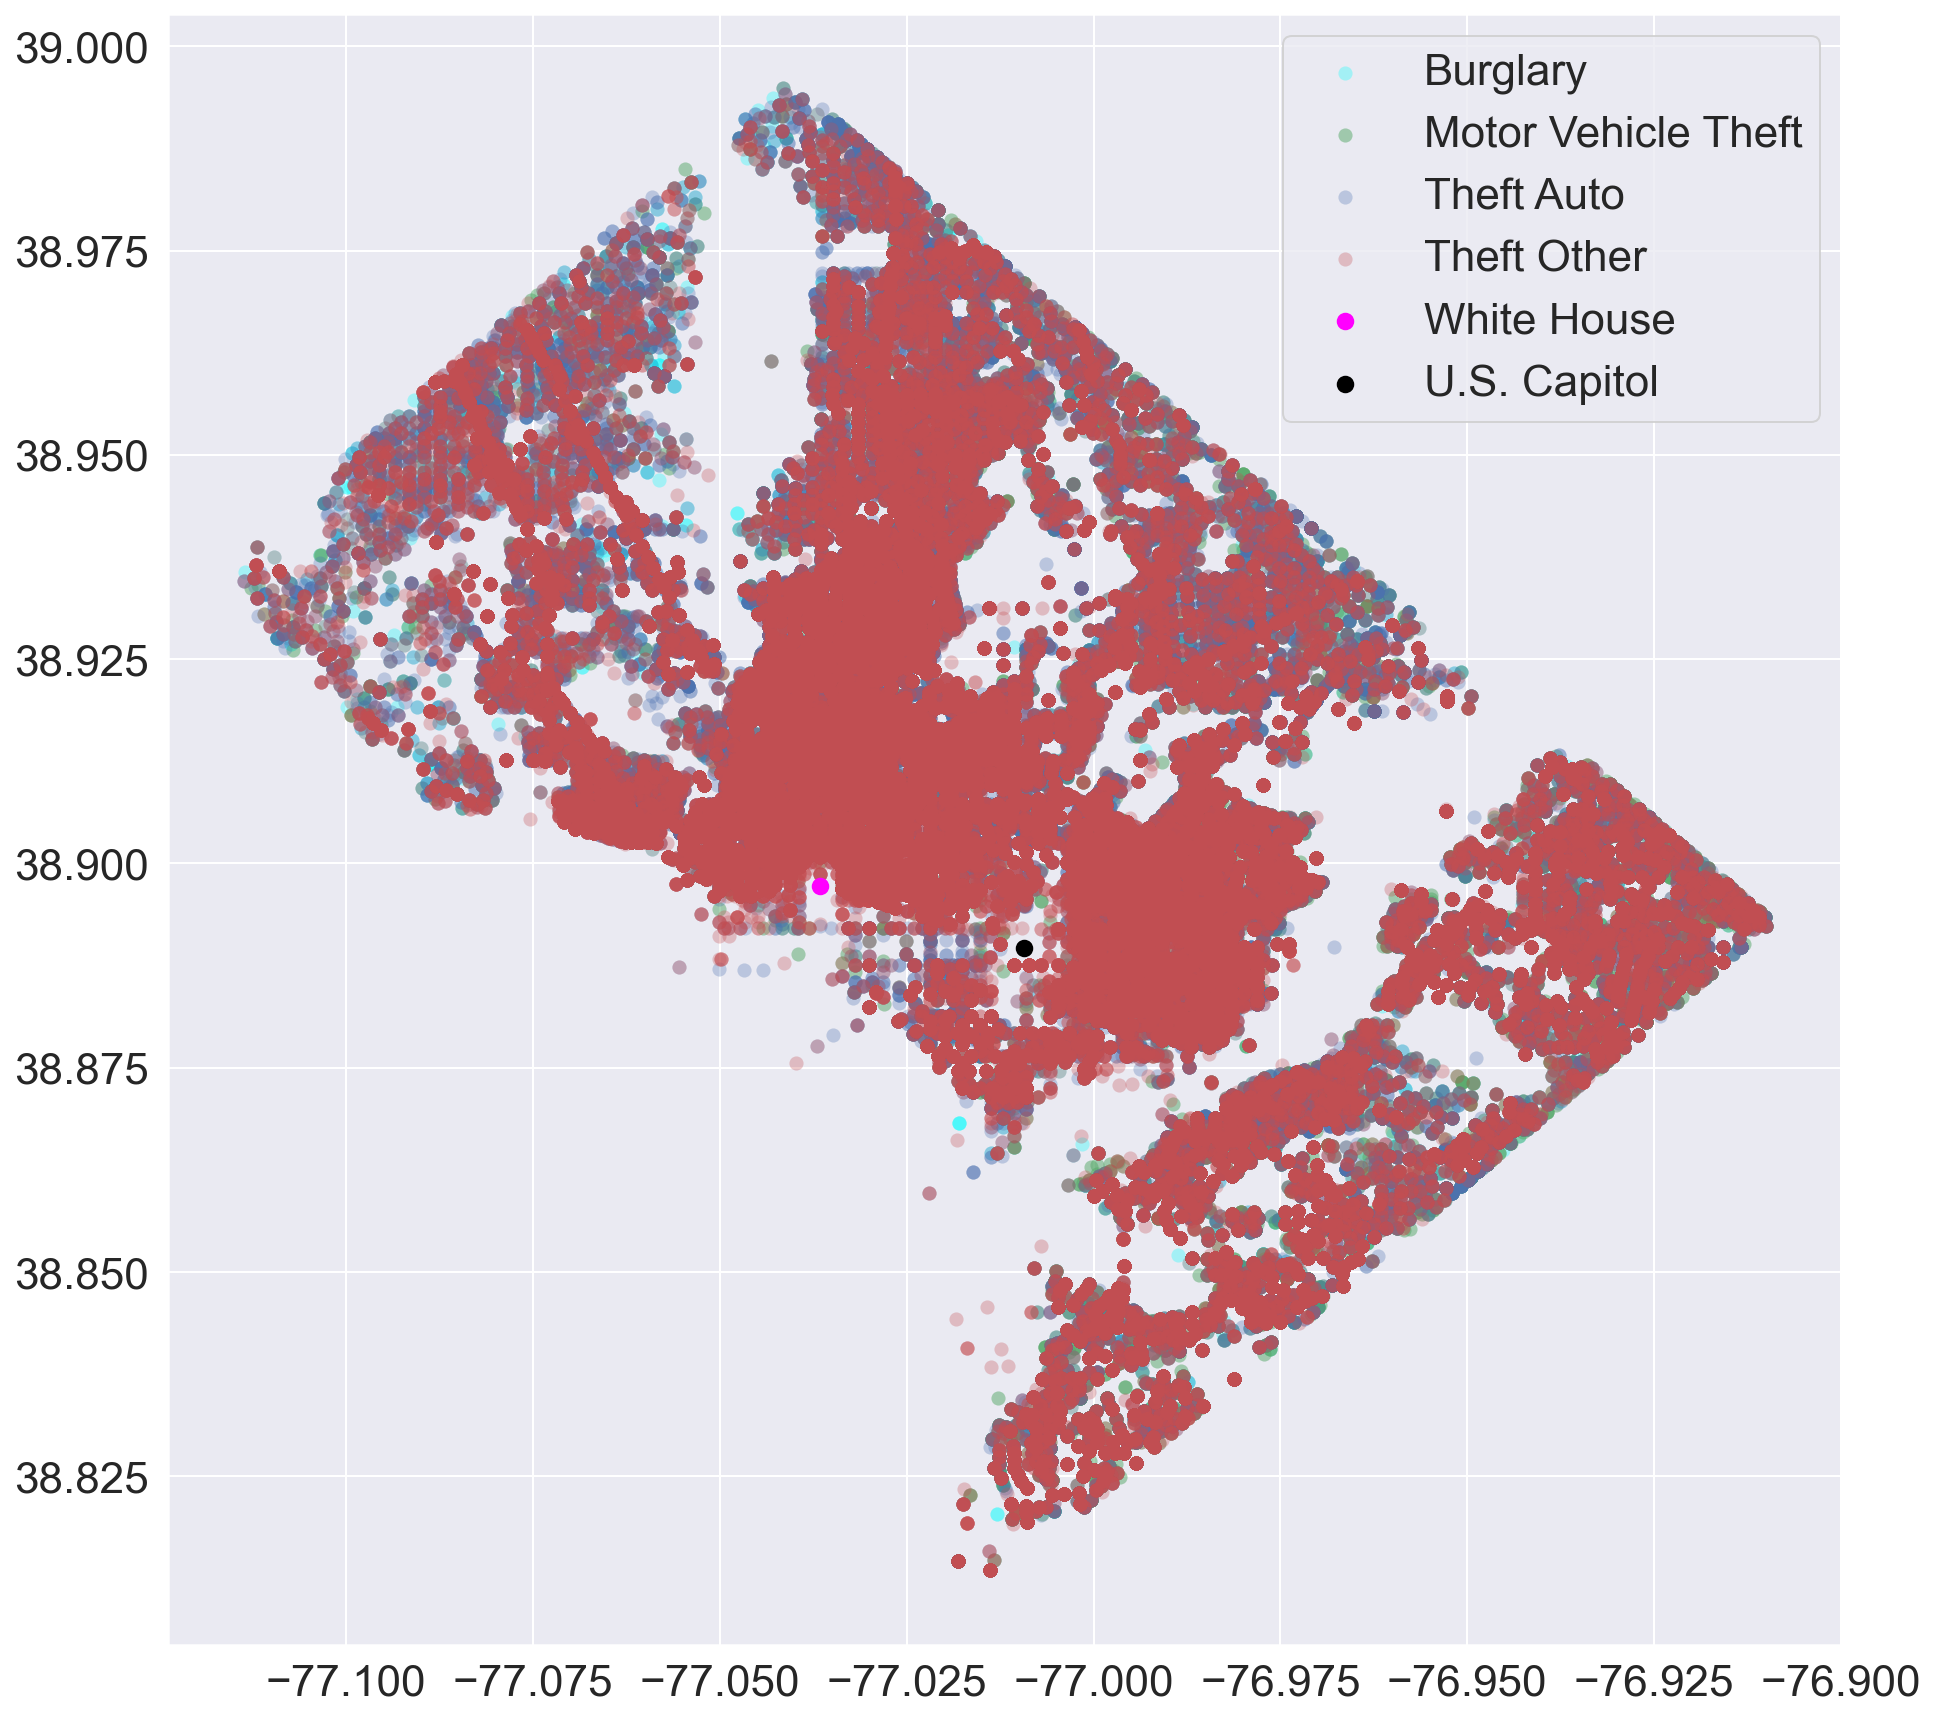

In [58]:
print("Where do non violent crimes occur?")
print("Non Violent crimes ALSO tend to occur away from high secruity areas such as the White House and US Capitol. ")
print("")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(data_merge['XBLOCK'][data_merge['OFFENSE']=='BURGLARY'], data_merge['YBLOCK'][data_merge['OFFENSE']=='BURGLARY'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='Burglary')
plt.scatter(data_merge['XBLOCK'][data_merge['OFFENSE']=='MOTOR VEHICLE THEFT'], data_merge['YBLOCK'][data_merge['OFFENSE']=='MOTOR VEHICLE THEFT'], s=50, alpha=0.5, color='g', lw=0, label='Motor Vehicle Theft')
plt.scatter(data_merge['XBLOCK'][data_merge['OFFENSE']=='THEFT F/AUTO'], data_merge['YBLOCK'][data_merge['OFFENSE']=='THEFT F/AUTO'], s=50, alpha=0.3, color='b', lw=0, label='Theft Auto')
plt.scatter(data_merge['XBLOCK'][data_merge['OFFENSE']=='THEFT/OTHER'], data_merge['YBLOCK'][data_merge['OFFENSE']=='THEFT/OTHER'], s=50, alpha=0.3, color='r', lw=0, label='Theft Other')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
# plt.scatter(-60,60,s=30, color=[0,1,0], lw=1, label='WARD 8') 
plt.legend(loc='upper right')
plt.show()

---

#### <u>Section 3: Conclusion</u>

*Metrics like Income, Development and Race are deeply intertwined with the prevalence of crime in each ward. Often it is a chicken and egg dilemma, where higher security only comes with higher incomes but incomes are affected by development of each area.*

*And even so, within high development high income areas, crime still  persists albeit in different forms.*

*More analysis can be done to understand the root of crime, but more data is needed. From demographics of criminals and victims to the understanding of police districts and the time of shifts.*